# Global COVID-19 Trends and New Case Prediction for the USA

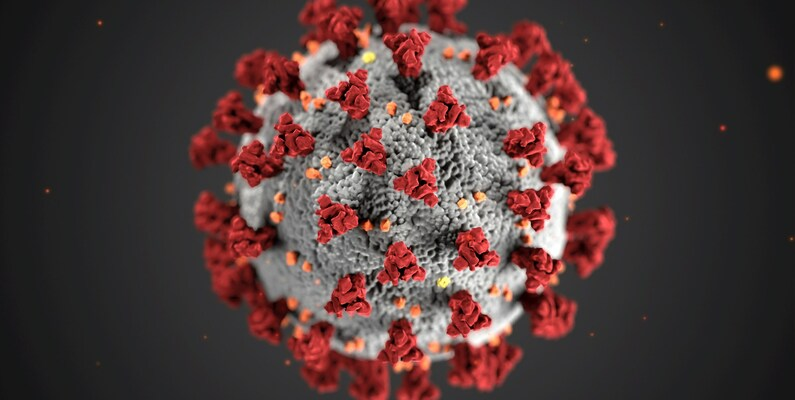![](cov.jpeg)

**Overview:** The primary goal of this project is to analyze WHO global COVID-19 data to understand the COVID-19 trends around the globe and  to develop a machine learning model to predict new cases in the United States.
This will involve:
- **Eploratory Data Analysis:** The dataset is available on [Kaggle](https://www.kaggle.com/datasets/abdoomoh/daily-covid-19-data-2020-2024). This dataset, provided by the World Health Organization (WHO), contains daily reported COVID-19 cases and deaths worldwide during 2020 -2024. It consists of 57,840 entries and 8 columns, covering various epidemiological statistics.
- **Modeling:** Supervised machine learning algorithms such as ARIMA, SARIMA, and neural networks will be used to predict/forecast the number of new cases in the USA.


#### The project follows a structured ML pipeline, including:

- [1. Data Loading and Analysis](#1)
- [2. Exploratory Data Analysis](#2)
- [3. Train/Test split](#3)
- [4. Hyperparameter tuning](#4)
- [5. ARIMA Modeling](#5)
- [6. SARIMA Modeling](#6)
- [7. Feature Engineering and Exog SARIMA Modeling](#7)
- [8. Random Forest Modeling](#8)
- [9. XGBoost Modeling](#9)
- [10. Model Performance Analysis](#10)
- [11. Results](#11)
- [12. Deployment](#12)

The results of this study can help policymakers and educators understand the strongest predictors of language learning success, potentially guiding future language programs and interventions.

#### Project Contributors

This project was developed by:
- [Preeti Dubey](https://www.linkedin.com/in/preetidubeyphd/)
Postdoc at University of Washington

This project was reviewed by the program leader [Vikesh Koul](https://www.linkedin.com/in/vikeshkoul/)  and completed as part of the final capstone project for the PCMLAI certification.






##1. Data Loading and Analysis


#### Import Module

In [1]:
!pip install pandas==2.2.2 numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstalling pytz-2025.1:
      Successfully uninstalled pytz-2025.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.1
    Uninstalling tzdata-2025.1:
      Successfully uninstalled tzdata-2025.1
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,9)
plt.style.use("fivethirtyeight")

# prepare data
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge

import plotly.express as px

import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import itertools
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Reinstalling numpy and pmdarima to resolve compatibility issues
!pip install numpy==1.26.4
!pip install pmdarima
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

print("All modules are loaded")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.3 MB/s eta 0:00:00
All modules are loaded


In [3]:
# Load and read WHO COVID19 global data
covid = pd.read_csv("global_covid.csv", sep=';')

In [4]:
# display first 5 rows of the data
display(covid.head(2))

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [5]:
# change column names with upper case letter to lower case
covid.columns = covid.columns.str.lower()
display(covid.head(2))

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [6]:
# determine the shape of the dataframe
print("Number of rows and columns")
print(covid.shape)

Number of rows and columns
(57840, 8)


In [7]:
# check data types of each column
print("Data types of each column")
covid.info()

Data types of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_reported      57840 non-null  object 
 1   country_code       57599 non-null  object 
 2   country            57840 non-null  object 
 3   who_region         53502 non-null  object 
 4   new_cases          39028 non-null  float64
 5   cumulative_cases   57840 non-null  int64  
 6   new_deaths         25001 non-null  float64
 7   cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [8]:
# find the details of dataset
print("Statistics of COVID-19 Data")
covid.describe(include='all').T

Statistics of COVID-19 Data


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date_reported,57840,241,05/01/2020,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,57599,239,AF,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,57840,240,Afghanistan,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,53502,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,39028.0,NaN,NaN,NaN,19881.036743,270782.29363,-65079.0,43.0,393.0,3968.0,40475477.0
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,7797691.437049,0.0,4162.75,45883.0,522087.25,103436829.0
new_deaths,25001.0,NaN,NaN,NaN,282.323947,1214.392195,-3432.0,4.0,20.0,105.0,47687.0
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,81864.399905,0.0,28.0,565.0,6974.5,1194158.0


## Data Cleaning

In [9]:
#find the percentage of missing values
missing = covid.isnull().sum()
missing_percentage = (covid.isnull().sum() / len(covid)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
print(missing_df)

                   Missing Values  Percentage
date_reported                   0    0.000000
country_code                  241    0.416667
country                         0    0.000000
who_region                   4338    7.500000
new_cases                   18812   32.524205
cumulative_cases                0    0.000000
new_deaths                  32839   56.775588
cumulative_deaths               0    0.000000


Handle missing country codes:
Since the country name is there so we can fill the country code using country names data

In [10]:
# Check unique country code
print("Unique country codes are here:")
display(covid['country_code'].unique())

# Find countries with missing country codes
missing_codes = covid[covid['country_code'].isnull()]['country'].unique()

print("\nCountries with missing country codes:")

for country in missing_codes:
      print(country)

Unique country codes are here:


array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'XXL',
       'XXF', 'XXJ', 'XXI', 'XXG', 'XXH', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM',
       'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', na


Countries with missing country codes:
Namibia


In [11]:
# fill the country code of Namibia as NA to missing values
covid.loc[covid['country'] == 'Namibia', 'country_code'] = 'NA'
# check for null values in country codes
covid['country_code'].isnull().sum()

0

In [12]:
# # drop the country code column as we have country name and this column seems redundant with that
# covid.drop('country_code', axis=1, inplace=True)
# display(covid.head())

In [13]:
# look for unique who region
display(covid['who_region'].unique())

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', nan, 'OTHER'],
      dtype=object)

In [14]:
# Create a mapping from country to WHO region using non-null values
country_to_region = covid[['country', 'who_region']].dropna().drop_duplicates().set_index('country')['who_region'].to_dict()

# Check the first few entries
#print(country_to_region)

# Fill missing WHO regions based on the extracted mapping
covid['who_region'] = covid['who_region'].fillna(covid['country'].map(country_to_region))

# Check remaining missing regions
remaining_missing = covid[covid['who_region'].isnull()]
print(f"Remaining countries without WHO region data: {remaining_missing['country'].unique()}")
covid['who_region'].isna().sum()


Remaining countries without WHO region data: ['Falkland Islands (Malvinas)' 'Faroe Islands' 'French Guiana' 'Gibraltar'
 'Guadeloupe' 'Guernsey' 'Holy See' 'Isle of Man' 'Jersey' 'Liechtenstein'
 'Martinique' 'Mayotte' 'Pitcairn' 'R�union' 'Saint Barth�lemy'
 'Saint Helena' 'Saint Martin (French part)' 'Saint Pierre and Miquelon']


4338

In [15]:
# create missing countries mapping to their WHO regions
country_to_region_mapping = {
    "Falkland Islands (Malvinas)": "AMRO",
    "Faroe Islands": "EURO",
    "French Guiana": "AMRO",
    "Gibraltar": "EURO",
    "Guadeloupe": "AMRO",
    "Guernsey": "EURO",
    "Holy See": "EURO",
    "Isle of Man": "EURO",
    "Jersey": "EURO",
    "Liechtenstein": "EURO",
    "Martinique": "AMRO",
    "Mayotte": "AFRO",
    "Pitcairn": "WPRO",
    "R�union": "AFRO",  # Fix encoding issue if needed
    "Réunion": "AFRO",  # Correct version
    "Saint Barth�lemy": "AMRO",  # Fix encoding
    "Saint Barthélemy": "AMRO",  # Correct version
    "Saint Helena": "AFRO",
    "Saint Martin (French part)": "AMRO",
    "Saint Pierre and Miquelon": "AMRO"
}


In [16]:
# Fill missing WHO regions using the above mapping
covid['who_region'] = covid['who_region'].fillna(covid['country'].map(country_to_region_mapping))

# Check again for any missing WHO regions
covid['who_region'].isna().sum()


0

In [17]:
# drop rows where who region is other
covid = covid[covid['who_region'] != 'OTHER']


Handle missing values in cases and deaths: We will impute missing values in weekly new cases and weekly new deaths as zeros. This approach assumes that unreported data most likely reflects no new cases/deaths that week, rather than an unknown value. This aligns with public health reporting practices, ensures time series continuity, and prevents model errors from undefined values.

In [18]:
# fill missing values in  new cases with zero
covid['new_cases'].fillna(0, inplace=True)
print(covid['new_cases'].isna().sum())

# fill missing values in  deaths with zero
covid['new_deaths'].fillna(0, inplace=True)
print(covid['new_deaths'].isna().sum())

0
0


In [19]:
# format the date reported
covid['date_reported'] = pd.to_datetime(covid['date_reported'], format='%d/%m/%Y')
covid['date_reported'].nunique()

241

In [20]:
# add a new column as year
covid['year'] = covid['date_reported'].dt.year
covid['year'].unique()
covid['year'].isna().sum()

# add a new column as month
covid['month'] = covid['date_reported'].dt.month
covid['month'].unique()
covid['month'].isna().sum()


0

In [21]:
# check the stats of cleaned dataset
print("Statistics of Cleaned COVID-19 Data")
covid.describe(include='all').T

Statistics of Cleaned COVID-19 Data


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,56394,NaN,NaN,NaN,2022-04-24 00:00:00.000000256,2020-01-05 00:00:00,2021-02-28 00:00:00,2022-04-24 00:00:00,2023-06-18 00:00:00,2024-08-11 00:00:00,NaN
country_code,56394,234,AF,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,56394,234,Afghanistan,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,56394,6,EURO,14942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,56394.0,NaN,NaN,NaN,13758.845586,-65079.0,0.0,56.0,1353.0,40475477.0,225450.093977
cumulative_cases,56394.0,NaN,NaN,NaN,1838554.713516,0.0,5635.0,51380.5,569716.5,103436829.0,7891679.086156
new_deaths,56394.0,NaN,NaN,NaN,125.161684,-3432.0,0.0,0.0,13.0,47687.0,820.64169
cumulative_deaths,56394.0,NaN,NaN,NaN,20523.255258,0.0,37.0,668.0,7431.5,1194158.0,82843.80105
year,56394.0,NaN,NaN,NaN,2021.838174,2020.0,2021.0,2022.0,2023.0,2024.0,1.343026
month,56394.0,NaN,NaN,NaN,6.195021,1.0,3.0,6.0,9.0,12.0,3.395068


### As we see that the dataset has some negative values, which does not make sense for the cases. We will replace those negative values with zero.

In [22]:
# # replace all the numerical columns with negative entries in dataset with zero
covid.loc[covid['new_cases'] < 0, 'new_cases'] = 0
covid.loc[covid['new_deaths'] < 0, 'new_deaths'] = 0
covid.loc[covid['cumulative_cases'] < 0, 'cumulative_cases'] = 0
covid.loc[covid['cumulative_deaths'] < 0, 'cumulative_deaths'] = 0
print("Statistics of dataset after removing negative values")
covid.describe(include='all').T

Statistics of dataset after removing negative values


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,56394,NaN,NaN,NaN,2022-04-24 00:00:00.000000256,2020-01-05 00:00:00,2021-02-28 00:00:00,2022-04-24 00:00:00,2023-06-18 00:00:00,2024-08-11 00:00:00,NaN
country_code,56394,234,AF,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,56394,234,Afghanistan,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,56394,6,EURO,14942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,56394.0,NaN,NaN,NaN,13760.056247,0.0,0.0,56.0,1353.0,40475477.0,225449.853392
cumulative_cases,56394.0,NaN,NaN,NaN,1838554.713516,0.0,5635.0,51380.5,569716.5,103436829.0,7891679.086156
new_deaths,56394.0,NaN,NaN,NaN,125.23194,0.0,0.0,0.0,13.0,47687.0,820.502402
cumulative_deaths,56394.0,NaN,NaN,NaN,20523.255258,0.0,37.0,668.0,7431.5,1194158.0,82843.80105
year,56394.0,NaN,NaN,NaN,2021.838174,2020.0,2021.0,2022.0,2023.0,2024.0,1.343026
month,56394.0,NaN,NaN,NaN,6.195021,1.0,3.0,6.0,9.0,12.0,3.395068


In [23]:
# remove all the zeros from cases data for future analysis where we need nonzero numbers
covid = covid[covid['new_cases'] != 0]
covid = covid[covid['new_deaths'] != 0]
covid = covid[covid['cumulative_cases'] != 0]
covid = covid[covid['cumulative_deaths'] != 0]

In [24]:
# Check for duplicates
covid.duplicated().sum()

0

In [25]:
# save this cleaned data to clean global covid csv file
covid.to_csv('cleaned_global_covid.csv', index=False)

In [26]:
#check the min and max and stats for the new dataset
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,24803,NaN,NaN,NaN,2021-11-25 05:06:22.163447808,2020-01-05 00:00:00,2021-01-31 00:00:00,2021-10-24 00:00:00,2022-08-07 00:00:00,2024-08-11 00:00:00,NaN
country_code,24803,226,IT,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,24803,226,Italy,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,24803,6,EURO,8999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,24803.0,NaN,NaN,NaN,30856.312664,1.0,336.0,1884.0,9835.0,40475477.0,338699.353999
cumulative_cases,24803.0,NaN,NaN,NaN,2812731.991896,1.0,30364.5,260491.0,1453793.5,103436829.0,9321290.805493
new_deaths,24803.0,NaN,NaN,NaN,281.143571,1.0,4.0,20.0,104.0,47687.0,1217.07635
cumulative_deaths,24803.0,NaN,NaN,NaN,33873.271378,1.0,417.0,3923.0,19616.0,1127152.0,98215.566897
year,24803.0,NaN,NaN,NaN,2021.411724,2020.0,2021.0,2021.0,2022.0,2024.0,1.074581
month,24803.0,NaN,NaN,NaN,6.385034,1.0,3.0,6.0,9.0,12.0,3.424446


# Exploratory Data Analysis (EDA) Global
Here I have performed the EDA for global WHO data.

In [27]:
# the number of daily cases in different countries shown in the map
# Group data by country and sum new cases
cases_by_country = covid.groupby('country')['new_cases'].sum().reset_index()

# Sort countries by total cases in descending order
cases_by_country = cases_by_country.sort_values('new_cases', ascending=False)

# show the cases and deaths plot
fig, figsize=(15, 8)

# show the cases plot on world map
fig = px.choropleth(
    cases_by_country,
    locations="country",
    locationmode="country names",
    color="new_cases",
    color_continuous_scale="OrRd",
    title="A glance of Total COVID-19 Cases by Country on the World Map",
    labels={'new_cases': 'Total Cases'}
)
fig.show()

# the number of total deaths in different countries on the world map
# Group data by country and sum new deaths
deaths_by_country = covid.groupby('country')['new_deaths'].sum().reset_index()

# Sort countries by total deaths in descending order
deaths_by_country = deaths_by_country.sort_values('new_deaths', ascending=False)

# show the deaths plot on world map
fig = px.choropleth(
    deaths_by_country,
    locations="country",
    locationmode="country names",
    color="new_deaths",
    color_continuous_scale="Viridis",
    title="A glance of Total COVID-19 Deaths by Country on the World Map",
    labels={'new_deaths': 'Total Deaths'}
)
fig.show()

**Key obsevations from cases map**
- United States (103.44M) , China (96M) , and India (44 M) reported the highest number of total cases.

- Europe has several countries shaded in moderate red, indicating a significant but relatively lower case count compared to the US and China.

- Africa, Australia, and smaller island nations appear lighter in color, suggesting fewer reported cases.

**Key obsevations from deaths map**
- United States (1.13M) with reported the highest number of total deaths.

- Brazil, India, and Russia also show significant death counts.

- Africa, Australia, and several smaller nations also indicates fewer recorded deaths.



    

    


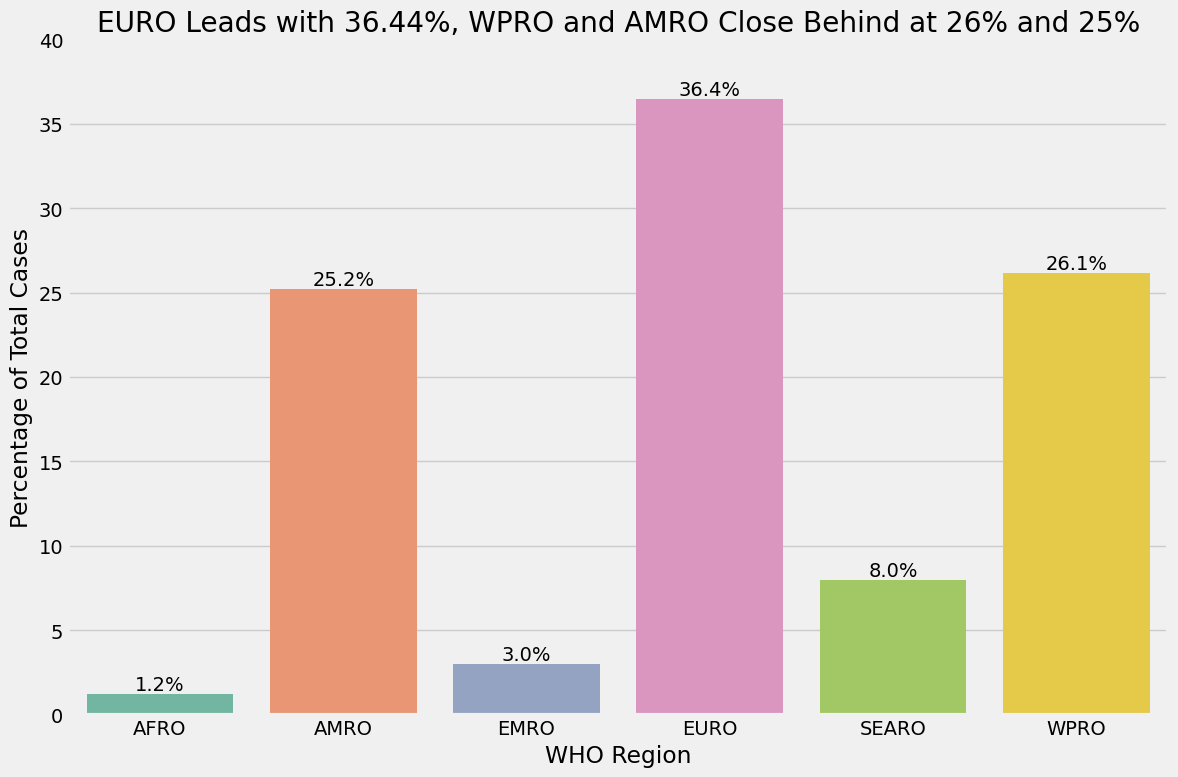

In [28]:
# aggregate cases data by WHO region
who_region_cases = covid.groupby('who_region')[['new_cases']].sum().reset_index()

# calculate the percentage of total cases for each region
total_cases = who_region_cases['new_cases'].sum()
who_region_cases['percentage'] = ((who_region_cases['new_cases'] / total_cases) * 100).round(2)


# Create the bar plot with percentage labels and custom colors
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=who_region_cases['who_region'], y=who_region_cases['percentage'], data=who_region_cases, palette="Set2")
#plt.xticks(rotation=45, ha='right')
plt.xlabel('WHO Region')
plt.ylabel('Percentage of Total Cases')
plt.ylim(0,40)
plt.title('EURO Leads with 36.44%, WPRO and AMRO Close Behind at 26% and 25%')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars.patches, who_region_cases['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Key Insights:**
- EURO seems the hardest-hit WHO region, accounting for 36.44% of global COVID-19 cases.
- WPRO (26%) and AMRO (25%) contributes to the similar number of cases.
This suggests that many countries in these regions experienced large outbreaks.

- In contrast, SEARO reports 8%, EMRO 3%, and AFRO has the lowest share at 1.19%, highlighting regional disparities in case distribution and implying many countries had smaller case counts.


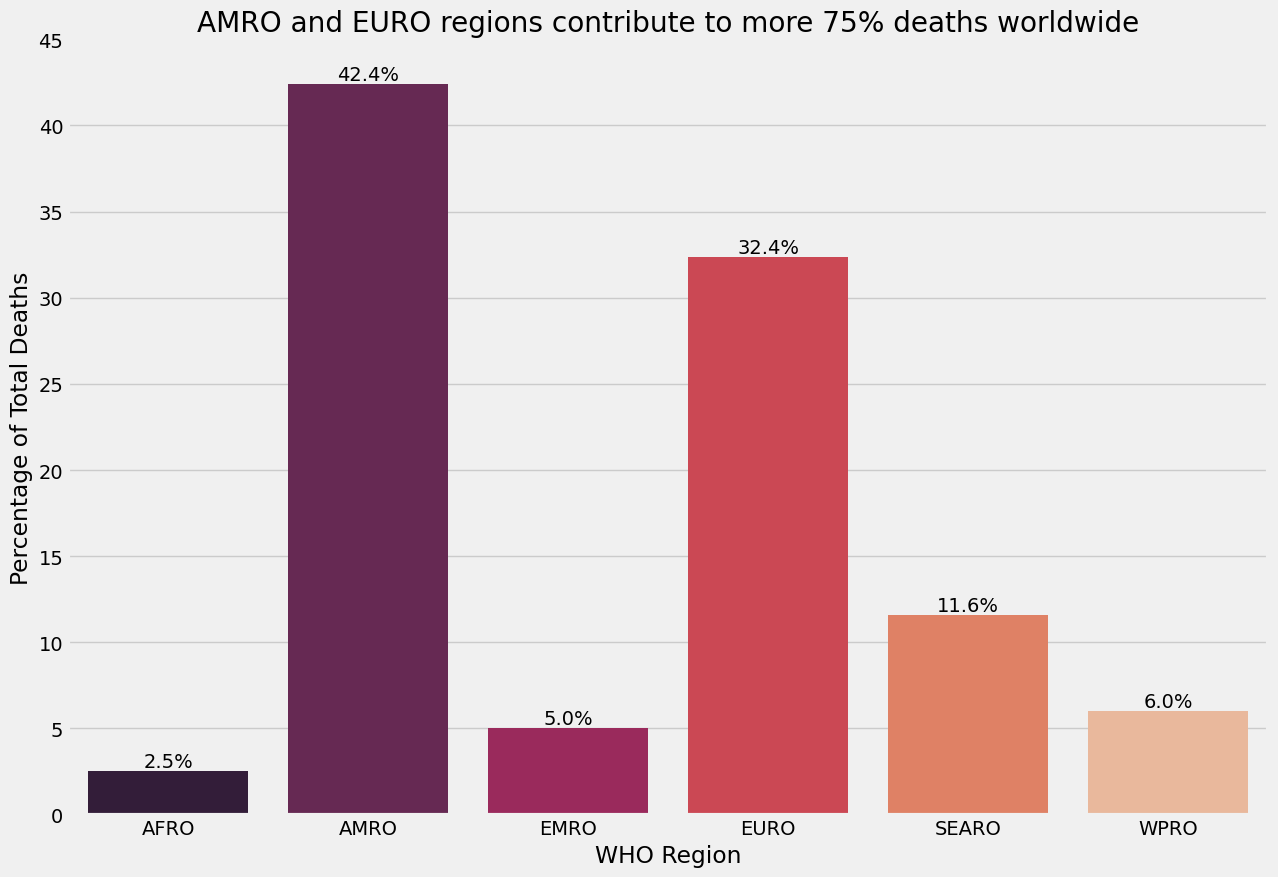

In [29]:
# aggregate deaths data by WHO region
who_region_deaths = covid.groupby('who_region')[['new_deaths']].sum().reset_index()

# calculate the percentage of total deaths for each region
total_deaths = who_region_deaths['new_deaths'].sum()
who_region_deaths['percentage'] = ((who_region_deaths['new_deaths'] / total_deaths) * 100).round(2)

# Create the bar plot with percentage labels and colors
plt.figure(figsize=(13, 9))
bars = sns.barplot(x=who_region_deaths['who_region'], y=who_region_deaths['percentage'], data=who_region_deaths, palette="rocket")
#plt.xticks(rotation=45, ha='right')
plt.xlabel('WHO Region')
plt.ylabel('Percentage of Total Deaths')
plt.ylim(0,45)
plt.title('AMRO and EURO regions contribute to more 75% deaths worldwide')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars.patches, who_region_deaths['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



 **Percentage of COVID-19 deaths across different WHO regions**.

- **AMRO** and **EURO** regions contribute significantly to the higher death counts, accounting for 42.4% and 32.4%, respectively.  

- **SEARO** accounts for 11.6% of deaths, **WPRO** and **EMRO** contribute 6% and 5%, respectively, falling within the mid-to-lower range.  

- **AFRO** contributes 2.5%, representing the **lower range** — suggesting that many countries in these regions experienced smaller case counts more frequently.  



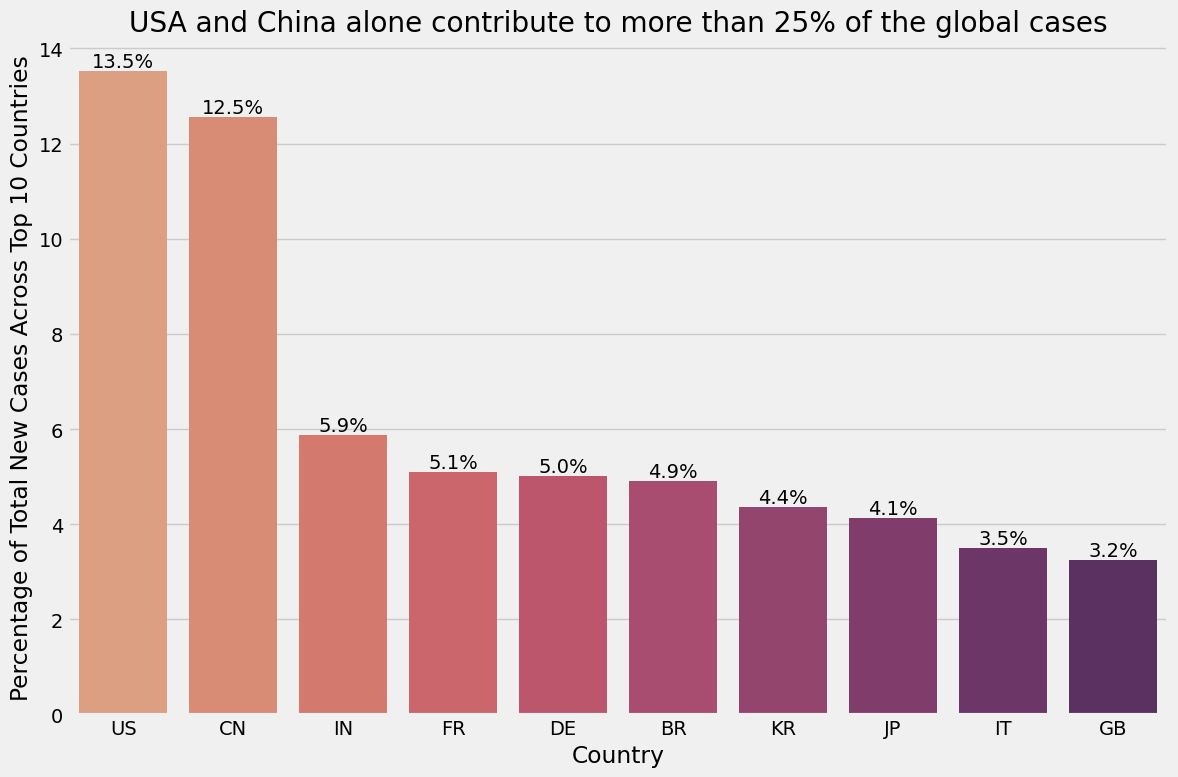

In [30]:
# Group data by country and sum new cases
cases_by_countrycode = covid.groupby('country_code')['new_cases'].sum().reset_index()

# Sort countries by total cases in descending order
top_10_countries = cases_by_countrycode.sort_values('new_cases', ascending=False).head(10)

# Calculate the percentage of new cases for each country
total_cases = cases_by_country['new_cases'].sum()
top_10_countries['percentage'] = (top_10_countries['new_cases'] / total_cases) * 100


# Create the bar plot with percentage labels and custom colors
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=top_10_countries['country_code'], y=top_10_countries['percentage'], data=top_10_countries, palette="flare") # Example color palette
#plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Percentage of Total New Cases Across Top 10 Countries')
plt.title('USA and China alone contribute to more than 25% of the global cases')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars.patches, top_10_countries['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Key Insights:**
The bar chart shows the percentage of new cases in top 10 countries.
- The USA and China has highest number of infected cases, 13.5% and 12.5% respectively.  
- United Kingdom of Great Britain and Northern Ireland (GB) has lowest number of infected cases, 3.2% among these top 10 countries.

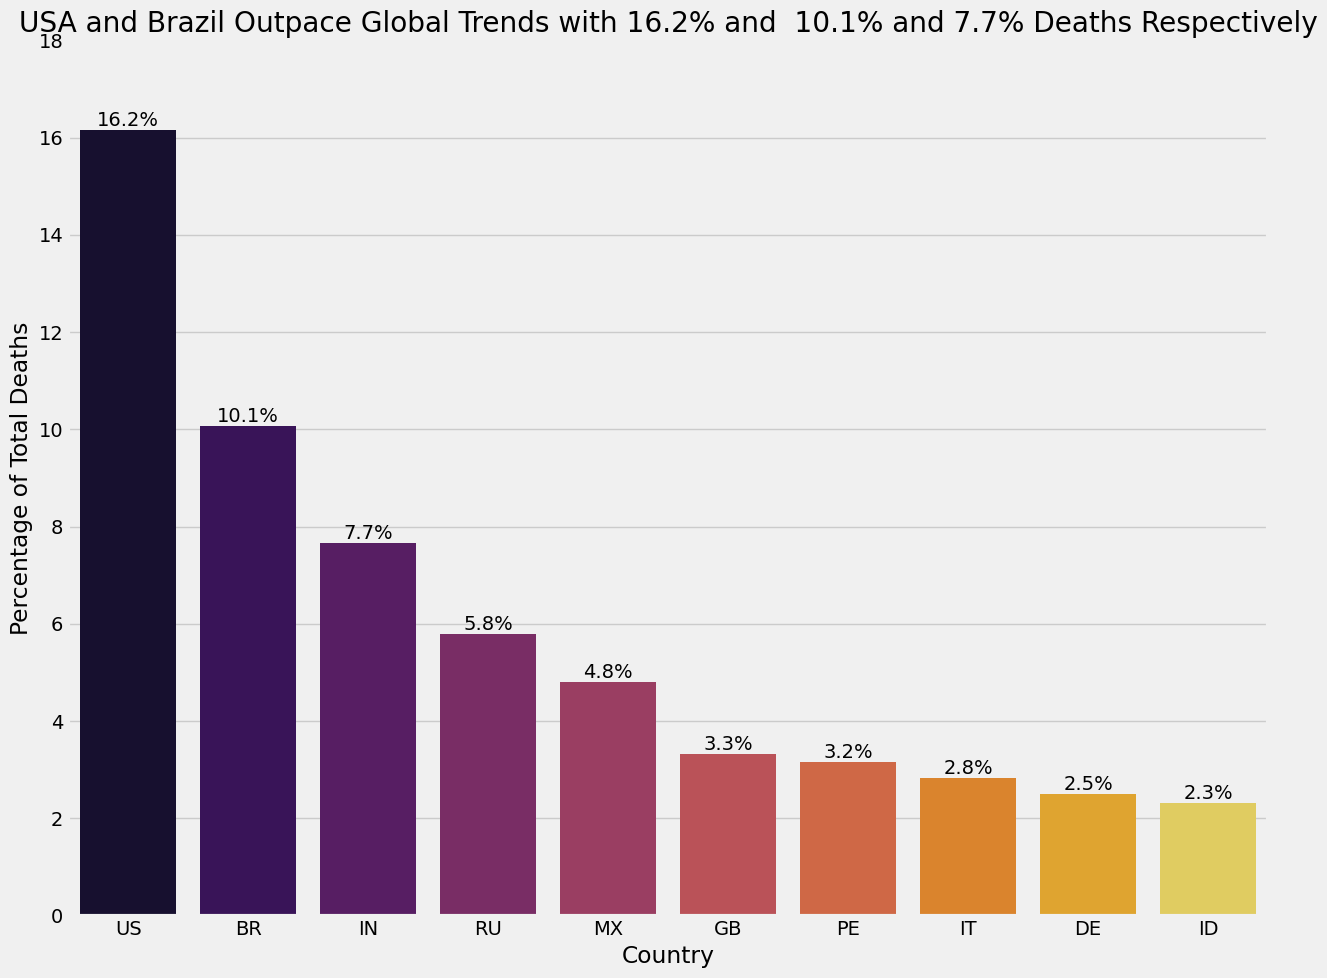

In [31]:
# Group data by country code and sum deaths
deaths_by_countrycode = covid.groupby('country_code')['new_deaths'].sum().reset_index()

# Sort countries by total deaths in descending order
top_10_countries_deaths = deaths_by_countrycode.sort_values('new_deaths', ascending=False).head(10)

# Calculate the percentage of new deaths for each country
total_deaths = deaths_by_countrycode['new_deaths'].sum()
top_10_countries_deaths['percentage'] = (top_10_countries_deaths['new_deaths'] / total_deaths) * 100


# Create the bar plot with percentage labels and custom colors for deaths
plt.figure(figsize=(13, 10))
bars = sns.barplot(x=top_10_countries_deaths['country_code'], y=top_10_countries_deaths['percentage'], data=top_10_countries_deaths, palette="inferno")
#plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Percentage of Total Deaths')
plt.ylim(0,18)
#plt.title('Top 8 Countries by Percentage of Total COVID-19 Deaths')
plt.title('USA and Brazil Outpace Global Trends with 16.2% and  10.1% and 7.7% Deaths Respectively')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars.patches, top_10_countries_deaths['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Key Insights:**
- The USA stands out significantly, leading with 16.2% of total deaths.
- Brazil follows with 10.1%, while India holds the third spot at 7.7%.
- Russia (5.8%) and Mexico (4.8%) also report notable contributions.
- The remaining countries — the UK (3.3%), Peru (3.2%), Italy (2.8%), Germany (2.5%), and Indonesia (2.3%) — show lower death proportions.

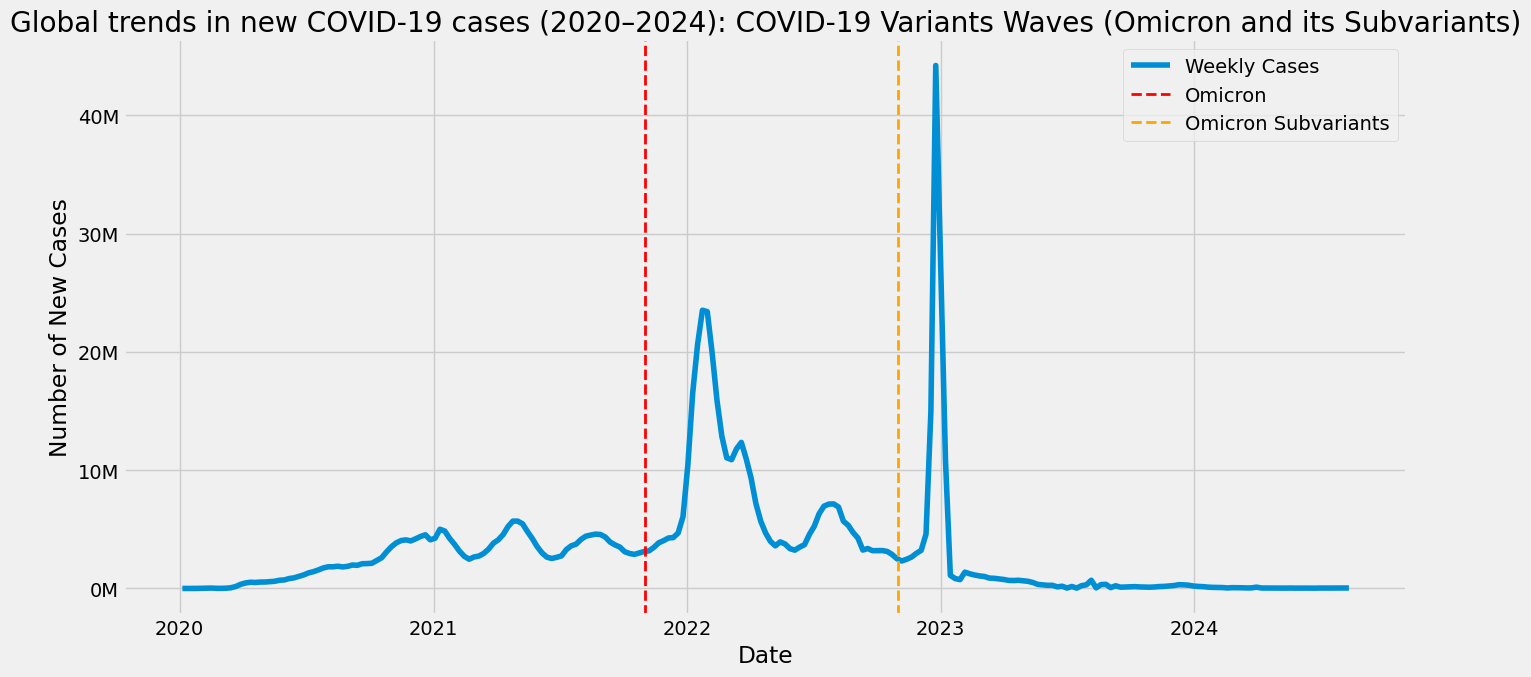

In [32]:
import matplotlib.ticker as mticker

# Group the data by date and sum the new cases for each date
cases_over_time = covid.groupby('date_reported')['new_cases'].sum()


# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(cases_over_time.index, cases_over_time.values, label='Weekly Cases')

# Convert the date string to a pandas Timestamp object
date_object1 = pd.to_datetime('2021-11-01')
date_object2 = pd.to_datetime('2022-11-01')

# Now use the date_object for axvline
plt.axvline(x=date_object1, color='red', linestyle='--', linewidth=2, label='Omicron')
plt.axvline(x=date_object2, color='orange', linestyle='--', linewidth=2, label='Omicron Subvariants')
# Format the Y-axis to general numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Add labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('Global trends in new COVID-19 cases (2020–2024): COVID-19 Variants Waves (Omicron and its Subvariants)')
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

plt.show()


**Key Takeaways:**

- The two peaks in 2022 and 2023 suggests different waves of infection (e.g., Omicron varaint and its subvariants waves).

- The other small peaks suggests the first outbreak started in the end of 2020 and then subsided slightly and then again started increasing in mid 2021 declining slightly due to the interventions.
- First peak occured in starting of 2022 and started to decrease due to interventions.
- The second peak suged in the winters of 2022 due to another variant of the virus and started decline due to interventions and vaccination. As of 2023 spring there was no outbreak of COVID-19.


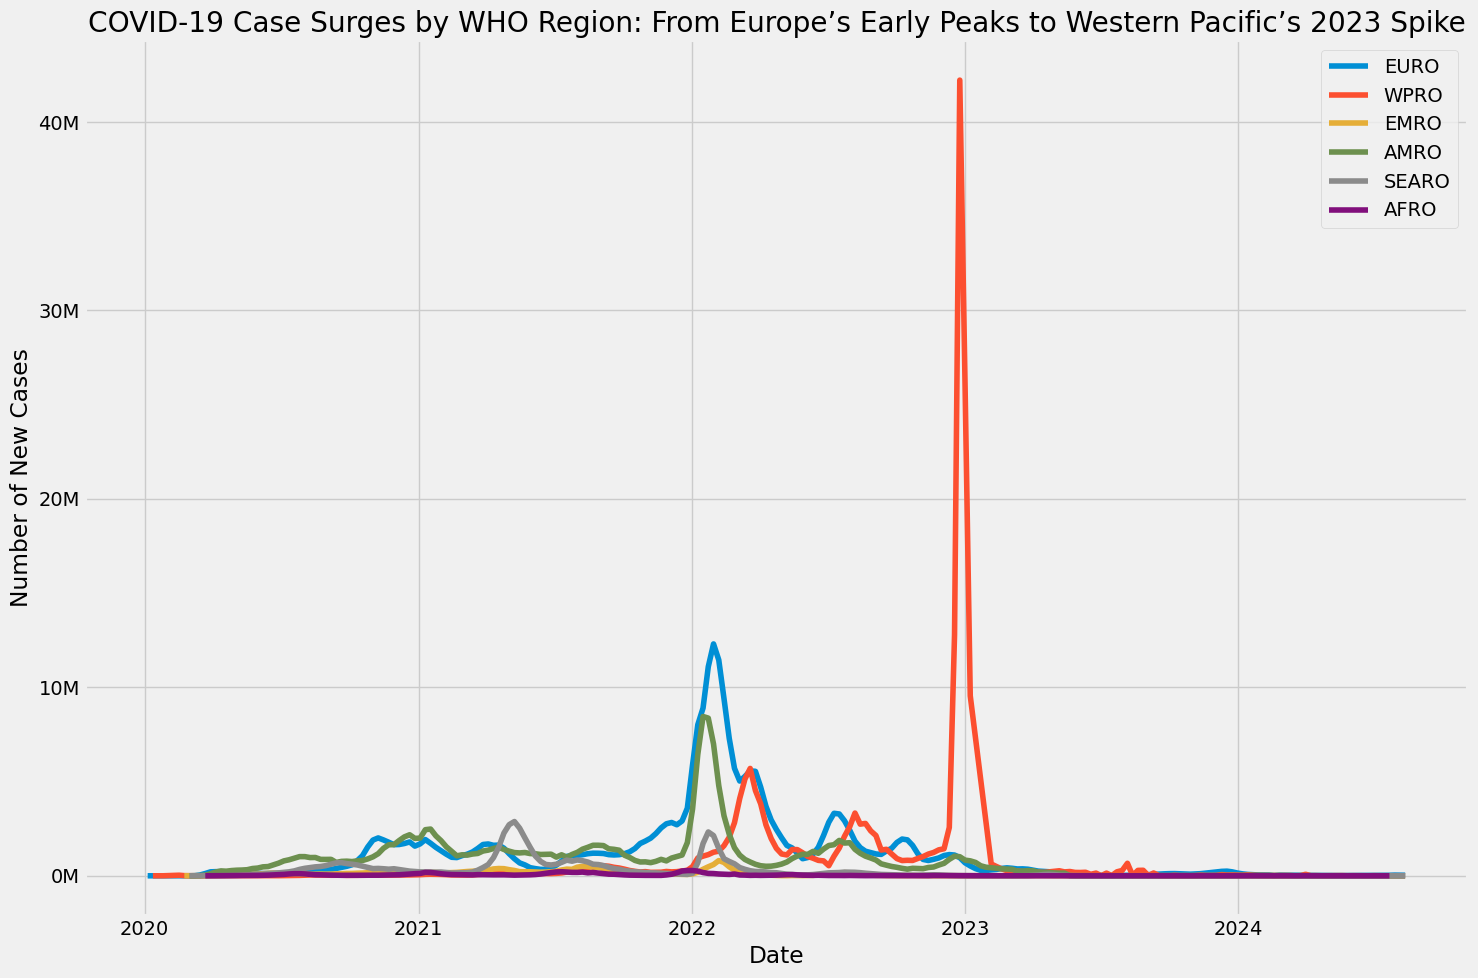

In [33]:
# Group data by date and region, then sum new cases
cases_over_time_by_region = covid.groupby(['date_reported', 'who_region'])['new_cases'].sum().reset_index()


# Create the plot
plt.figure(figsize=(15, 10))
for region in cases_over_time_by_region['who_region'].unique():
    region_data = cases_over_time_by_region[cases_over_time_by_region['who_region'] == region]
    plt.plot(region_data['date_reported'], region_data['new_cases'], label=region)

# Format the Y-axis to general numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))


plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('COVID-19 Case Surges by WHO Region: From Europe’s Early Peaks to Western Pacific’s 2023 Spike')
plt.grid(True)
#plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Key Insights**

From this plot we see that:
- EURO had highest number of cases in starting of 2022 and WPRO had highest number of cases in the end of 2022. Several peaks are visible, corresponding to major waves of COVID-19 outbreaks.
- The most prominent spike appears in 2023 (Western Pacific - WPRO, in orange), reaching over 40 million cases. This could be due to data reporting anomalies or a specific outbreak.
- Other significant peaks occur around 2021 and 2022, mainly driven by Europe (EURO) and the Americas (AMRO).
- After each major peak, case numbers drop significantly, likely due to vaccination efforts, public health interventions, and herd immunity. By late 2023 and early 2024, the number of new cases appears relatively low in all regions.

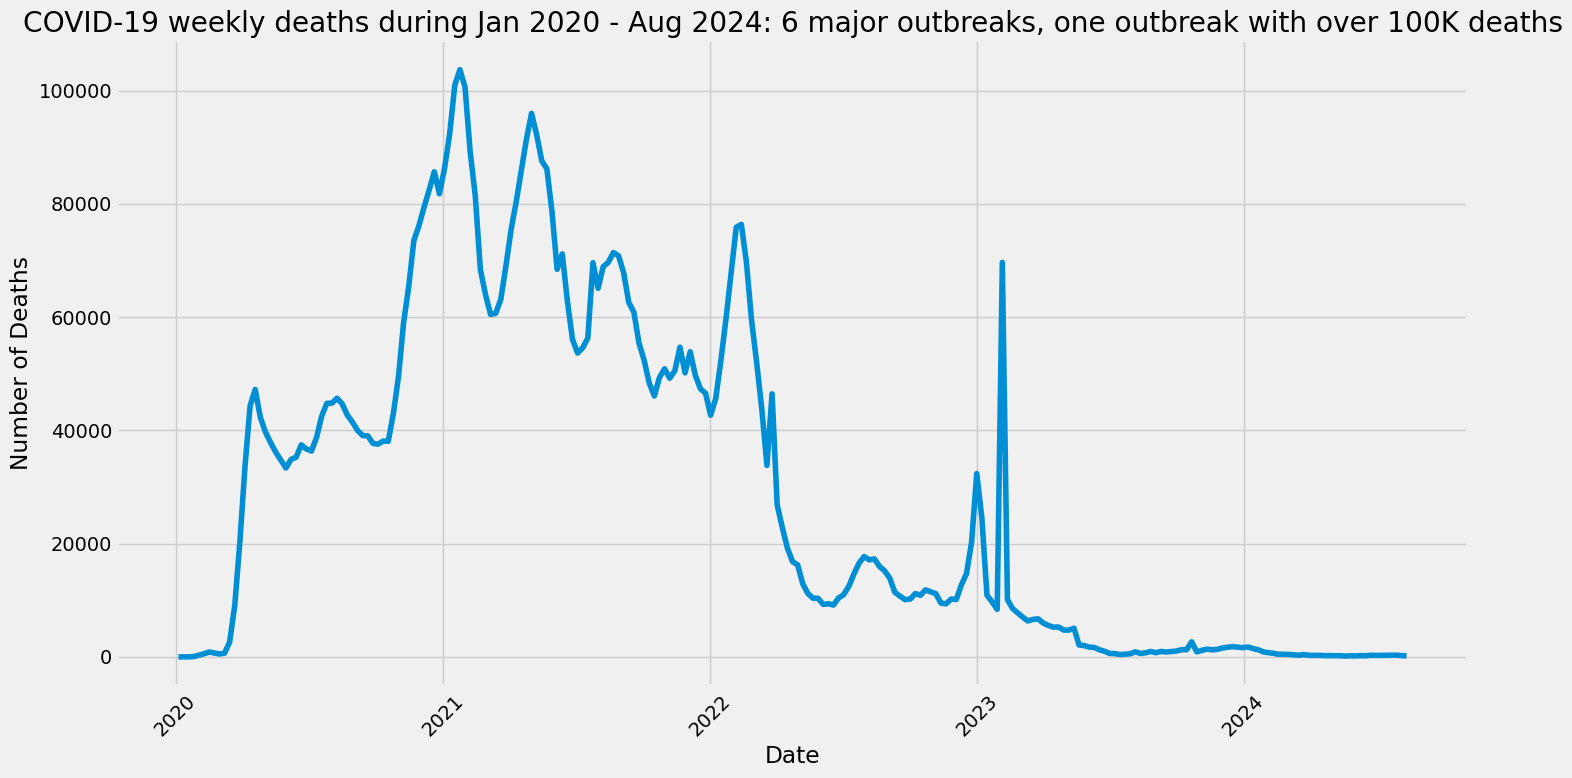

In [34]:
# Group data by date and sum the new deaths for each date
deaths_over_time = covid.groupby('date_reported')['new_deaths'].sum()

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(deaths_over_time.index, deaths_over_time.values)



plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 weekly deaths during Jan 2020 - Aug 2024: 6 major outbreaks, one outbreak with over 100K deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insights:**
- This plot shows that there were around 6 surges in number of deaths i.e. outbreak.
- It is also clear that the number of deaths are higher in recent years (peak in first quarter of 2021) due to the lack of intervention strategies for this new virus.
- The peak in starting of 2022 and end of 2022 shows that there was not enough intervent or treatment available to handle the huge surge in new cases.

            new_cases  new_deaths      year
new_cases    1.000000    0.288729  0.017106
new_deaths   0.288729    1.000000 -0.089047
year         0.017106   -0.089047  1.000000


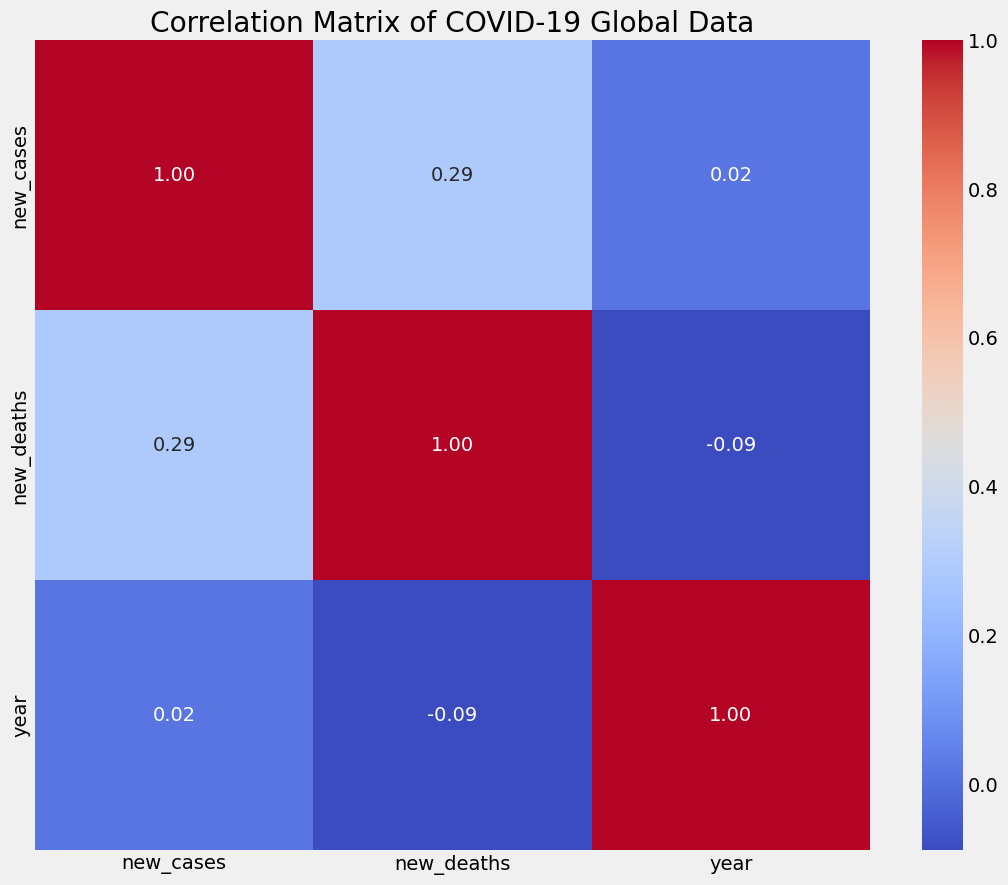

In [35]:
#correlation matrix for global data

corr_matrix = covid[['new_cases', 'new_deaths',  'year']].corr(numeric_only=True)

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Global Data')
plt.show()

We see that  new cases and new deaths are weakly positively correlated — more cases don’t always result in more deaths (likely due to medical advancements or less severe strains).
Time progression (year) doesn’t strongly correlate with either cases or deaths, implying COVID-19 trends are more driven by external events (e.g., policy changes, new variants, behavior changes) than a smooth year-to-year pattern.

## As we have seen that the highest cases were in USA and highest deaths were reported in USA. Now we will do EDA for USA and perform modeling for USA.

# **EDA for USA**
Here we will perform the EDA for USA.


In [36]:
# Reload the global who data to extract only country USA

us_covid = covid[covid["country"] == "United States of America"]

In [37]:
# save us covid data to us-covid csv file
us_covid.to_csv("us_covid.csv", index=False)
us_covid.head()

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month
55197,2020-03-01,US,United States of America,AMRO,33.0,73,1.0,1,2020,3
55198,2020-03-08,US,United States of America,AMRO,391.0,464,18.0,19,2020,3
55199,2020-03-15,US,United States of America,AMRO,3465.0,3929,50.0,69,2020,3
55200,2020-03-22,US,United States of America,AMRO,27486.0,31415,305.0,374,2020,3
55201,2020-03-29,US,United States of America,AMRO,94894.0,126309,1732.0,2106,2020,3


In [38]:
# sort the us covid dataset as per date
us_covid = us_covid.sort_values("date_reported")
us_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 55197 to 55364
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_reported      168 non-null    datetime64[ns]
 1   country_code       168 non-null    object        
 2   country            168 non-null    object        
 3   who_region         168 non-null    object        
 4   new_cases          168 non-null    float64       
 5   cumulative_cases   168 non-null    int64         
 6   new_deaths         168 non-null    float64       
 7   cumulative_deaths  168 non-null    int64         
 8   year               168 non-null    int32         
 9   month              168 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 13.1+ KB


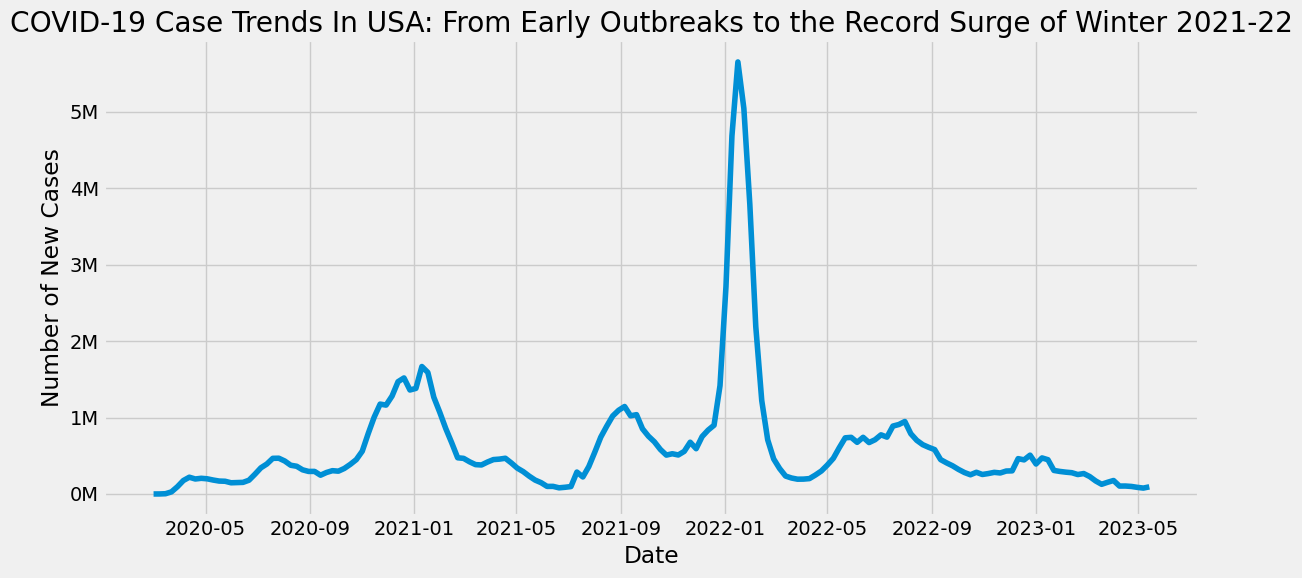

In [39]:
# plot the usa new cases over time

# Group data by date and sum new cases for the US
us_cases_over_time = us_covid.groupby('date_reported')['new_cases'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(us_cases_over_time.index, us_cases_over_time.values)
# Format the Y-axis to general numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('COVID-19 Case Trends In USA: From Early Outbreaks to the Record Surge of Winter 2021-22')

plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Insights:**
- The plot suggests multiple outbreaks during end of 2020 and end of 2022.
- The highest infection surge occured during Dec 2021 - Feb 2022. And there is no outbreaak as of now.

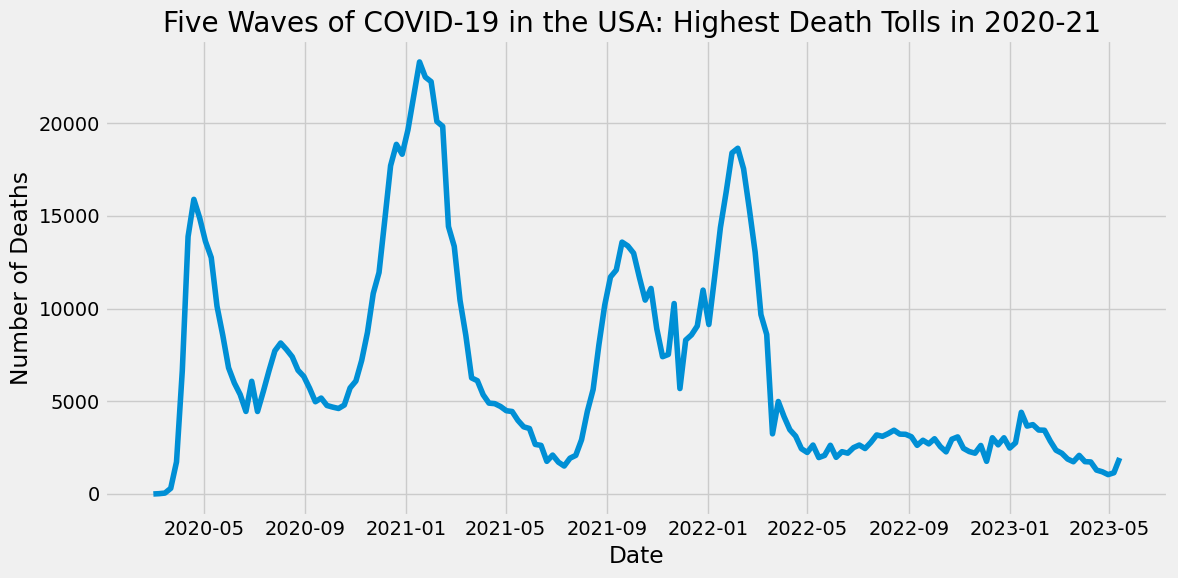

In [40]:
# plot the usa new deaths over time

# Group data by date and sum new deaths for the US
us_deaths_over_time = us_covid.groupby('date_reported')['new_deaths'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(us_deaths_over_time.index, us_deaths_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Five Waves of COVID-19 in the USA: Highest Death Tolls in 2020-21 ')
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Insights:**
- Five peaks in this plot, shows the deadlieast death toll during March 2020 - Feb 2022.
- The largest peak during end of 2020 and start of 2021 shows highest death toll.
- Second highest peak in early 2022 shows the impact of COVID virus variant Omicron. Gradualy decreasing after mid-2022 but still fluctuating slightly.

### Case Fatality Rate (CFR) Analysis

In [41]:
# Case Fatality Rate (CFR) Analysis
us_covid["CFR"] = (us_covid["cumulative_deaths"] / us_covid["cumulative_cases"]) * 100
us_covid["CFR"].isna().sum()

0

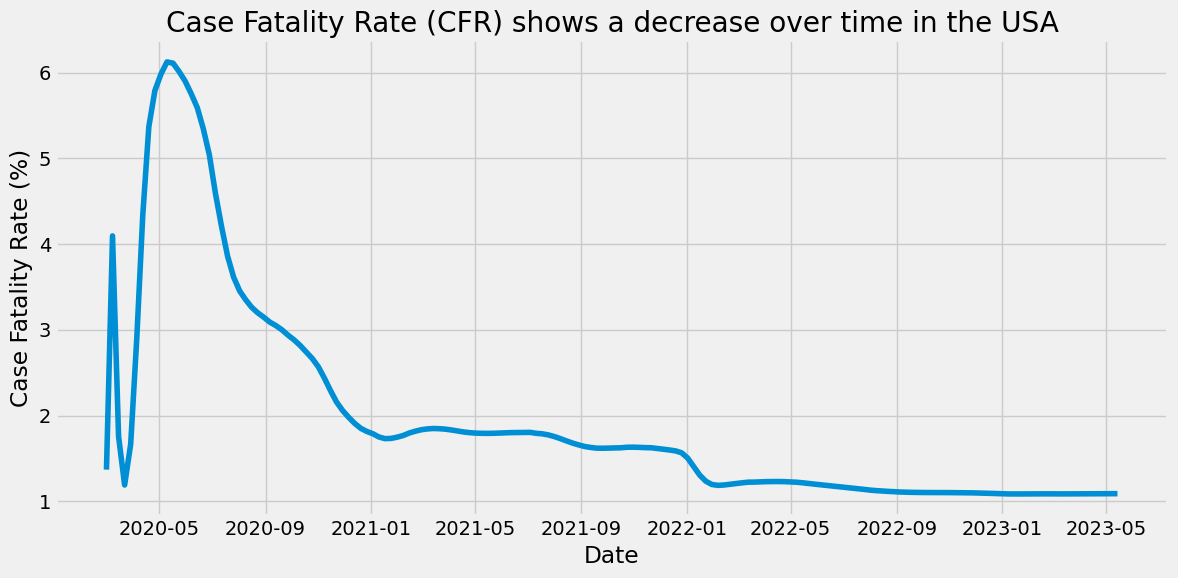

In [42]:
# Plot Case Fatality Rate (CFR) over time for the US
plt.figure(figsize=(12, 6))
plt.plot(us_covid['date_reported'], us_covid['CFR'])
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate (%)')
plt.title('Case Fatality Rate (CFR) shows a decrease over time in the USA')
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Insights:**
- Two peaks in CFR plot suggests that the high fatality rate from early 2020 to late 2020.
- Gradual decline suggests the availability of better intervention and vaccination.

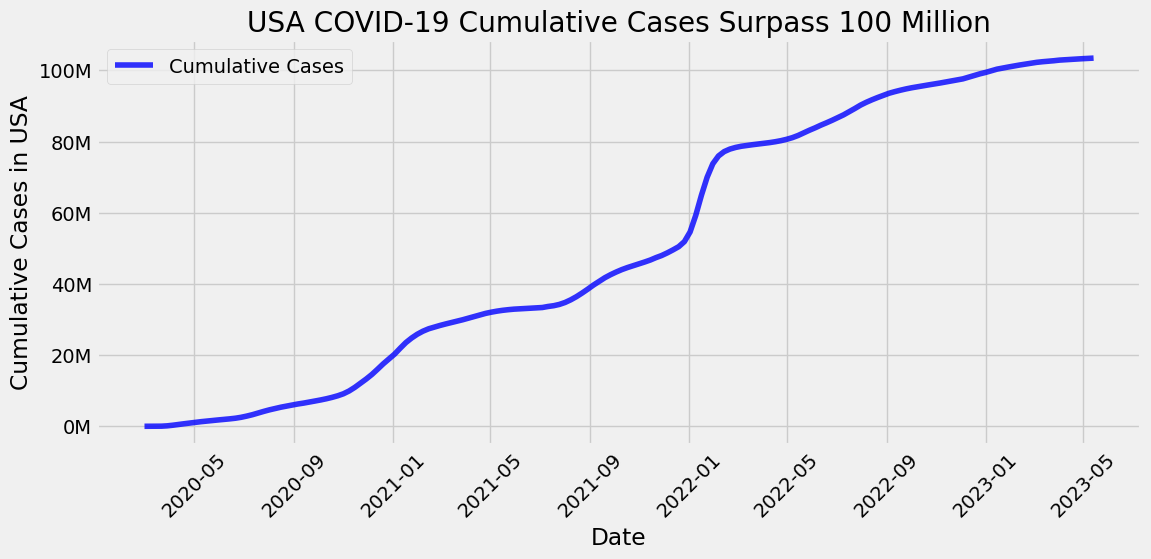

In [43]:
# USA-specific trend
us_covid = covid[covid['country'] == 'United States of America'].groupby('date_reported')[['new_cases', 'cumulative_cases']].sum()

plt.figure(figsize=(12,5))
#plt.plot(us_covid.index, us_covid['new_cases'], label="Daily New Cases", alpha=0.6, color='red')
plt.plot(us_covid.index, us_covid['cumulative_cases'], label="Cumulative Cases", alpha=0.8, color='blue')
# Format the Y-axis to general numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.title("USA COVID-19 Cumulative Cases Surpass 100 Million")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases in USA")
plt.xticks(rotation=45)
plt.legend()
plt.show()



The above plot shows the cumulative infected cases in USA are  103436829.

## 3. Train/Split

Here we will do the modeling to **predict **the spread of COVID19 across US i.e. **the number of new cases.**

In [44]:
# Data preprocessing for ARIMA model
# first reload us dataset with date column as index and include new cases only
us_df= covid[covid["country"] == "United States of America"].set_index("date_reported")[['new_cases']]

us_df.head()

,new_cases
date_reported,
2020-03-01,33.0
2020-03-08,391.0
2020-03-15,3465.0
2020-03-22,27486.0
2020-03-29,94894.0


### Data Training

In [45]:
# train and split the dataset
y_hist, y_future= train_test_split(us_df, shuffle=False)

In [46]:
# sample historical data
y_hist.head()

,new_cases
date_reported,
2020-03-01,33.0
2020-03-08,391.0
2020-03-15,3465.0
2020-03-22,27486.0
2020-03-29,94894.0


In [47]:
# import modules for autocorrelation
import statsmodels.graphics.tsaplots as tsaplots

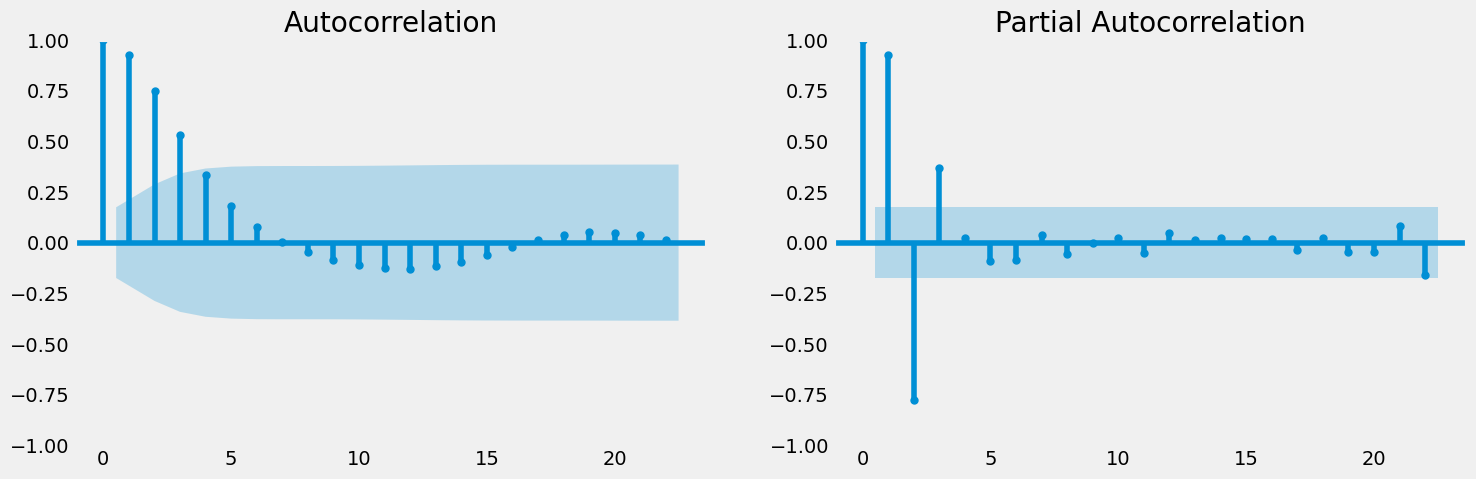

In [48]:
# chek if the data is stationary
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
tsaplots.plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
tsaplots.plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

# 4. Hyperparameter Tuning

With final dataset in hand, it is now time to build some models.  Here, I will use time-series forecasting models to predict the new cases in USA. Before that I will tune the hyperparameter

Use grid search cv for optimal hyperparameters.

In [49]:
# use grid search cv to find the optimal p, d, and q for arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools


p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic_a = float("inf")
best_order_a = None
best_model_a = None
best_mae_a = float('inf')
best_rmse_a = float('inf')

for order in pdq_combinations:
    try:
        arm_model = ARIMA(y_hist, order=order)
        arm_model_fit = arm_model.fit()

        predictions = arm_model_fit.predict(start=len(y_hist), end=len(us_df)-1)
        mae_a = mean_absolute_error(y_future, predictions)
        rmse_a = np.sqrt(mean_squared_error(y_future, predictions))

        if mae_a < best_mae_a:  # Prioritize lowest MAE
          best_mae_a = mae_a
          best_rmse_a = rmse_a
          best_aic_a = arm_model_fit.aic
          best_order_a = order
          best_model_a = arm_model_fit
        elif mae_a == best_mae_a and rmse_a < best_rmse_a: # If MAE is the same, choose the one with lower RMSE
          best_rmse_a = rmse_a
          best_aic_a = arm_model_fit.aic
          best_order_a = order
          best_model_a = arm_model_fit


    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}: {e}")

print(f"Optimal ARIMA order (based on lowest MAE, then RMSE): {best_order_a}")
print("AIC: ", best_aic_a.round(2))
print("BIC: ", best_model_a.bic.round(2))
print(f"Best MAE: {best_mae_a:.2f}")
print(f"Best RMSE: {best_rmse_a:.2f}")


Optimal ARIMA order (based on lowest MAE, then RMSE): (4, 2, 1)
AIC:  3380.63
BIC:  3397.55
Best MAE: 136441.29
Best RMSE: 158103.47


# 5. ARIMA Model

MAE_ARIMA: new_cases    134360.85
dtype: float64
RMSE_ARIMA: new_cases    157527.53
dtype: float64


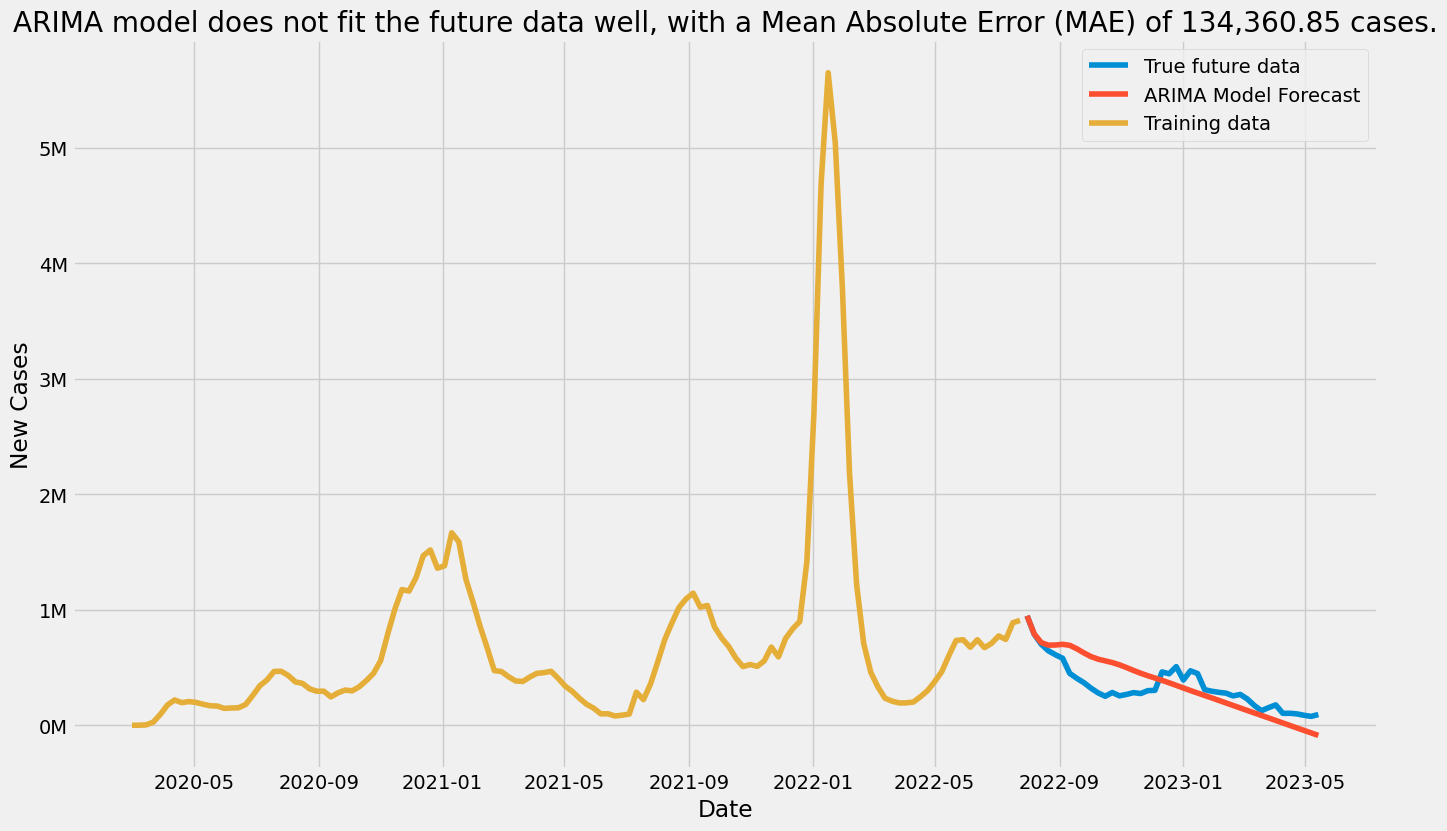

In [50]:
# Using best hyperparameters from grid search, Fit ARIMA model
arma_mod = ARIMA(y_hist, order=best_order_a).fit()  # p,d,q) values can be tuned
#model_fit = model.fit()

# Forecast next 30 days
arm_forecast = arma_mod.forecast(steps= len(y_future))
#print(forecast.head())
arm_forecast = arm_forecast.to_frame().rename(columns={'predicted_mean' : 'new_cases'})
arm_forecast.loc['2022-07-31'] = (y_future.loc['2022-07-31'])


# plot the forecast
plt.plot(y_future, label = 'True future data')
plt.plot(arm_forecast, label = 'ARIMA Model Forecast')
plt.plot(y_hist, label = 'Training data')
# Format the Y-axis to general numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.legend()
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('ARIMA model does not fit the future data well, with a Mean Absolute Error (MAE) of 134,360.85 cases.')
#plt.xticks(rotation = 45);

# prediction error
pred_error = y_future - arm_forecast
mae_arm = np.abs(pred_error).mean().round(2)

rmse_arm = np.sqrt((pred_error**2).mean()).round(2)
print(f'MAE_ARIMA: {mae_arm}')

print(f'RMSE_ARIMA: {rmse_arm}')



### **Evaluation Metrics for ARIMA Model**  
These metrics help evaluate the accuracy of the ARIMA model in forecasting COVID-19 cases.

##### **1. Mean Absolute Error (MAE):** **134,360.85**  
- MAE represents the average absolute difference between actual and predicted values.
- An MAE of **134,360** means that, on average, the model’s predictions deviate by **134,360 new cases** from the actual values.
- **Lower MAE indicates a better model fit.**  


##### **2. Root Mean Squared Error (RMSE):** **157,527.53**  
- RMSE is the square root of MSE and provides an interpretable error in the original unit (number of cases).
- An RMSE of **157,527** indicates that the model’s predictions typically vary by this amount.
- **Compared to MAE, RMSE penalizes larger errors more.**  



### **ARIMA Model Performance Analysis**
The MAE and RMSE values suggest that the ARIMA model provides a reasonable estimate of COVID-19 cases.  The forecast captures the general downward trend but **does not predict fluctuations accurately**. ARIMA is limited in handling sudden surges or policy-driven changes (e.g., new variants, lockdowns, or reporting anomalies).
**Errors are still significant**: Given the scale of COVID-19 cases, errors in the range of 100,000+ cases may impact policy decisions.  

**Next Steps:** Consider using SARIMA for capturing seasonality.


# 6. SARIMA Model


Optimal SARIMA order (based on lowest MAE, then RMSE): (1, 0, 1), (0, 0, 1, 12)
AIC_SRM: 3115.45
Best MAE SRM: 93492.03
Best RMSE SRM: 120133.13


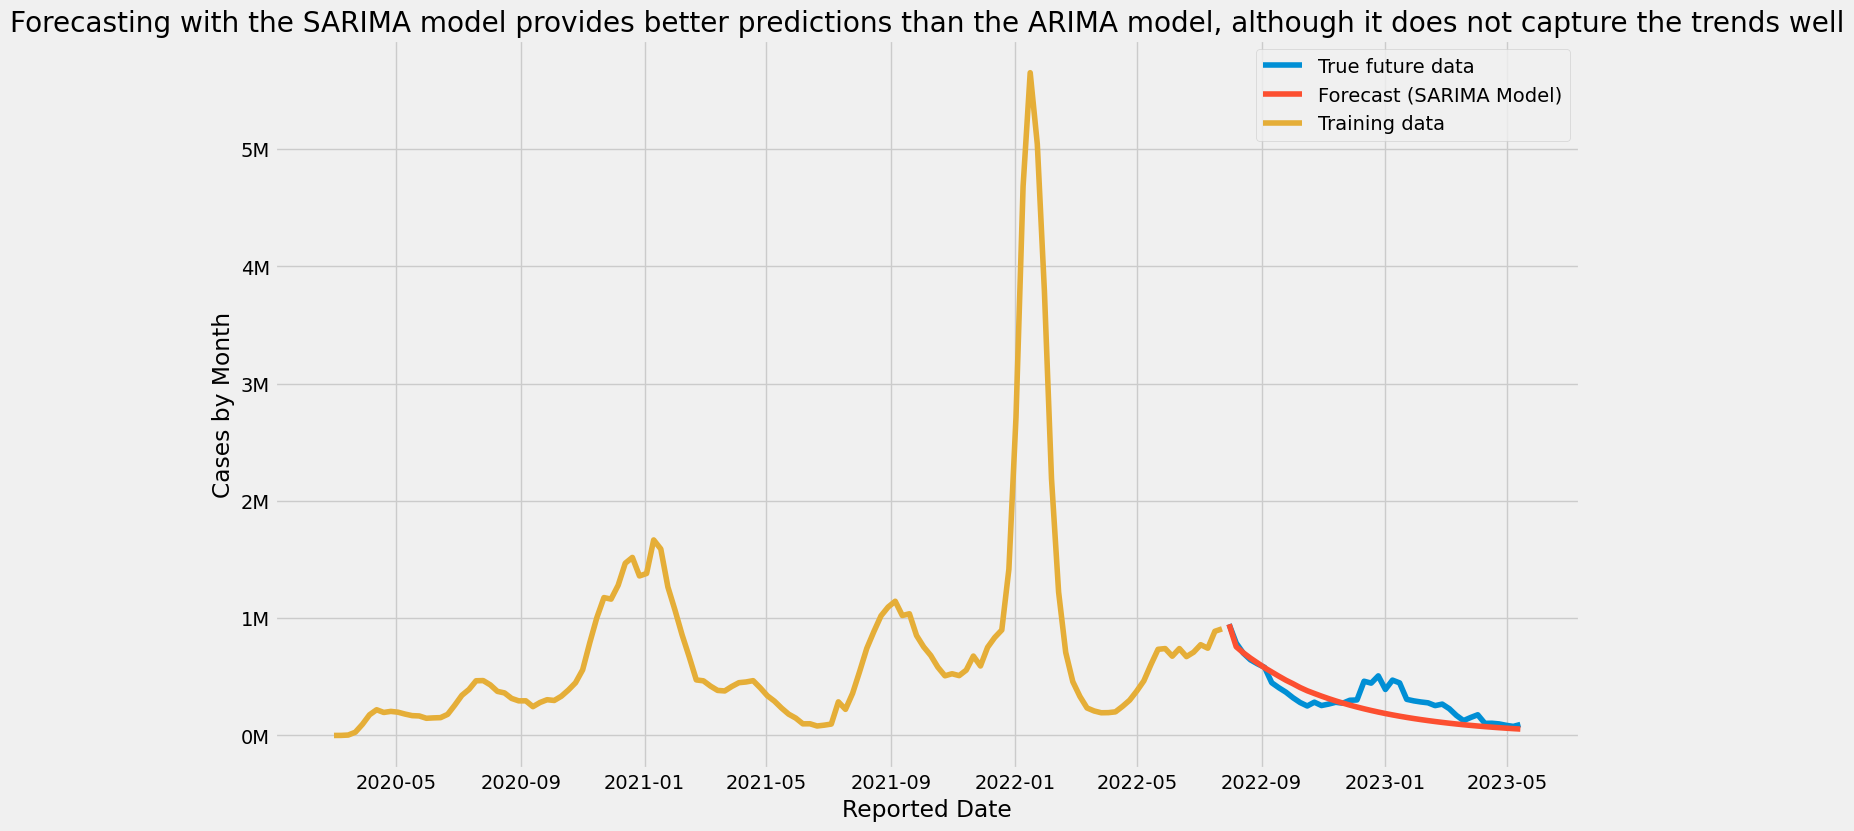

SARIMA MAE: new_cases    97100.1
dtype: float64
SARIMA RMSE: new_cases    128000.76
dtype: float64


In [51]:
# load SARIMA model from statsmodel

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, q, P, D, Q, and s values for the SARIMA model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic_s = float("inf")
best_order_s = None
best_seasonal_order = None
best_model_s = None
best_mae_s = float('inf')
best_rmse_s = float('inf')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            srm_mod = SARIMAX(y_hist,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = srm_mod.fit()

            srm_predictions = results.predict(start=len(y_hist), end=len(us_df)-1)
            mae_srm = mean_absolute_error(y_future, srm_predictions)
            rmse_srm = np.sqrt(mean_squared_error(y_future, srm_predictions))

            if mae_srm < best_mae_s:  # Prioritize lowest MAE
              best_mae_s = mae_srm
              best_rmse_s = rmse_srm
              best_aic_s = results.aic
              best_order_s = param
              best_seasonal_order = param_seasonal
              best_model_s = results
            elif mae_srm == best_mae_s and rmse_srm < best_rmse_s: # If MAE is the same, choose the one with lower RMSE
              best_rmse_s = rmse_srm
              best_aic_s= results.aic
              best_order_s = param
              best_seasonal_order = param_seasonal
              best_model_s= results

        except Exception as e:
            print(f"Error fitting SARIMA model with order {param} and seasonal order {param_seasonal}: {e}")

print(f"Optimal SARIMA order (based on lowest MAE, then RMSE): {best_order_s}, {best_seasonal_order}")
print(f"AIC_SRM: {best_aic_s:.2f}")
print(f"Best MAE SRM: {best_mae_s:.2f}")
print(f"Best RMSE SRM: {best_rmse_s:.2f}")


# Fit the best SARIMA model
sarima_mod = SARIMAX(y_hist, order=best_order_s, seasonal_order=best_seasonal_order).fit()

# Forecast future values
srm_forecast = sarima_mod.forecast(steps=len(y_future))
srm_forecast = srm_forecast.to_frame().rename(columns={'predicted_mean':'new_cases'})
srm_forecast.loc['2022-07-31'] = (y_future.loc['2022-07-31'])


# Plot the forecast
plt.plot(y_future, label='True future data')
plt.plot(srm_forecast, label='Forecast (SARIMA Model)')
plt.plot(y_hist, label='Training data')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.legend()
plt.xlabel('Reported Date')
plt.ylabel('Cases by Month')
plt.title('Forecasting with the SARIMA model provides better predictions than the ARIMA model, although it does not capture the trends well')
p#lt.xticks(rotation=45)
plt.show()


# Prediction error
pred_error_s = y_future - srm_forecast
mae_s = np.abs(pred_error_s).mean().round(2)

rmse_s= np.sqrt((pred_error_s**2).mean()).round(2)

print(f"SARIMA MAE: {mae_s}")

print(f"SARIMA RMSE: {rmse_s}")



### **SARIMA Model Evaluation Metrics**  

The **SARIMA (Seasonal ARIMA) model** incorporates seasonality into forecasting, making it suitable for time series data with recurring patterns.

#### **1. MAE:** 97,100.10
- **Compared to ARIMA (134,360 cases), SARIMA performs better**, reducing the average error by **~37,000 cases**.


#### **2. RMSE:** 128,000.76  
- **SARIMA's RMSE (128,000) is lower than ARIMA's (157,527),** suggesting it makes fewer large errors.



### **Model Performance Analysis:**

#### Based on the metrics,  **SARIMA outperforms ARIMA** in accuracy:

Lower MAE, MSE, and RMSE indicate better predictive performance. The reduction in errors suggests that SARIMA effectively captures seasonal trends in COVID-19 cases.

**Next Steps:**
Consider feature engineering using the data, e.g. weekly growth rate, rolling average, and reproduction number and then perform SARIMA with those exogeneous variables.


# 7.exog SARIMA Model
### Here we will perform some feature engineering to improve the SARIMA model predictions.

MAE EXOG SARIMA: 79856.35
RMSE EXOG SARIMA: 93155.53
AIC: 3669.55, BIC: 3689.84


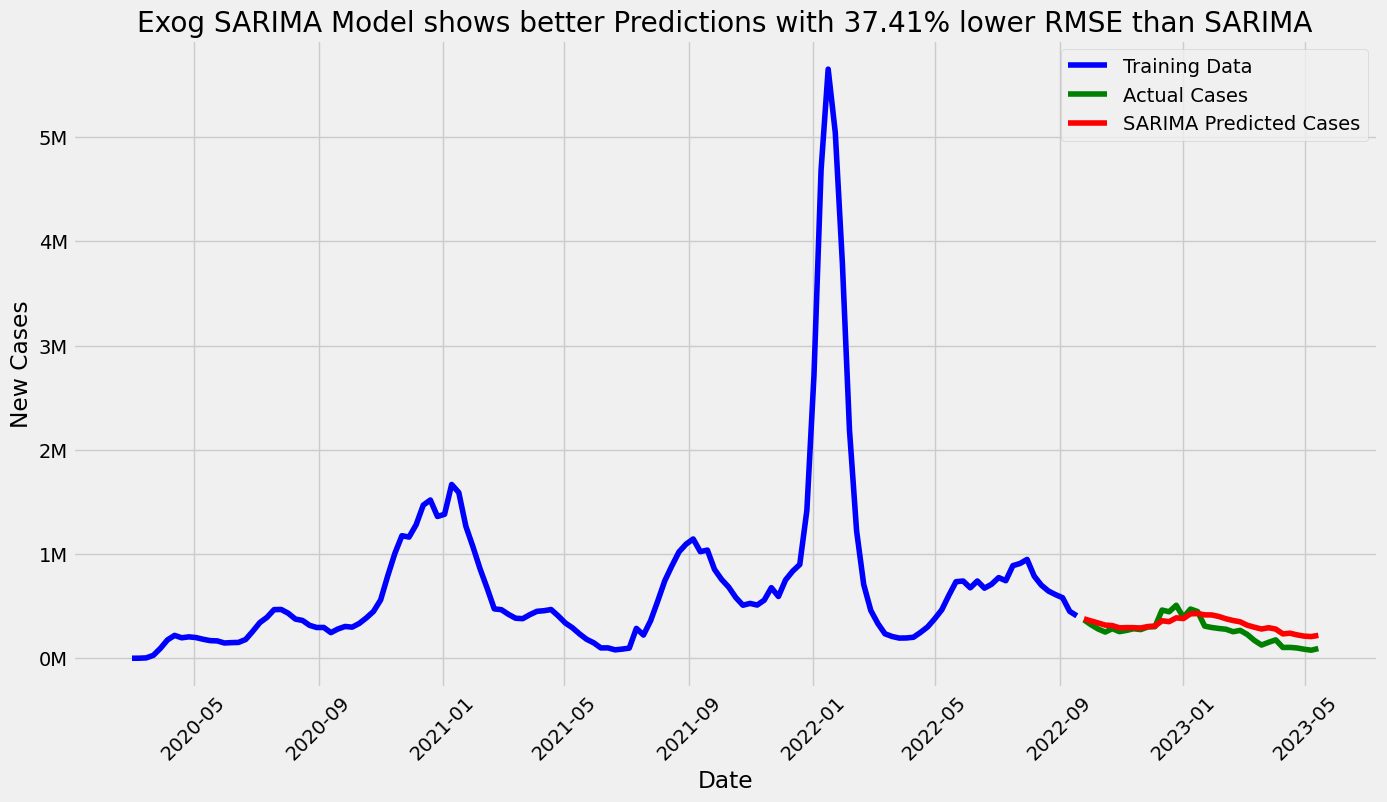

In [52]:
# 7-week moving average
us_df['7_week_MA'] = us_df['new_cases'].rolling(window=7).mean()

# Week-over-week growth rate
us_df['weekly_growth_rate'] = ((us_df['new_cases'] - us_df['new_cases'].shift(1)) / us_df['new_cases'].shift(1)) * 100

# Reproduction number (weekly R₀ approximation)
serial_interval_weeks = 1
us_df['R_t'] = us_df['new_cases'] / us_df['new_cases'].shift(serial_interval_weeks)

# Fill any NaNs from shifts
us_df.fillna(method='bfill', inplace=True)

# train and split the data
train_size = int(len(us_df) * 0.8)
train, test = us_df.iloc[:train_size], us_df.iloc[train_size:]

# Weekly data with external regressors
model = SARIMAX(
    train['new_cases'],
    exog=train[['7_week_MA', 'weekly_growth_rate', 'R_t']],
    order=(1, 0, 1),          # Autoregressive, differencing, moving average
    seasonal_order=(0, 0, 1, 8)  # Weekly seasonality (52 weeks/year)
)

# fit the model
model_fit = model.fit(disp=False)

exog_test = test[['7_week_MA', 'weekly_growth_rate', 'R_t']]

predictions = model_fit.predict(start=len(train), end=len(us_covid)-1, exog=exog_test)


# # Prediction error
mae = mean_absolute_error(test['new_cases'], predictions)
print(f"MAE EXOG SARIMA: {mae:.2f}")
rmse = np.sqrt(mean_squared_error(test['new_cases'], predictions))
print(f"RMSE EXOG SARIMA: {rmse:.2f}")


print(f"AIC: {model_fit.aic:.2f}, BIC: {model_fit.bic:.2f}")

# Plotting the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(train['new_cases'], label='Training Data', color='blue')
plt.plot(test['new_cases'], label='Actual Cases', color='green')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.plot(test.index, predictions, label='SARIMA Predicted Cases', color='red')
plt.legend()
plt.title('Exog SARIMA Model shows better Predictions with 37.41% lower RMSE than SARIMA')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [53]:
# Calcualte the % change in mae from SaRIMA with no feature and SARIMA with EXog
sarima = 97100.098177
sarima_exog = 79856.35
# perc_change in the mae
perc_mae = ((sarima - sarima_exog) / sarima_exog) * 100
print(f"Percentage change in MAE: {perc_mae:.2f}%")

Percentage change in MAE: 21.59%


In [54]:
# Calcualte the % change in rmse from SaRIMA with no feature and SARIMA with EXog
sarima_rmse = 128000.76
sarima_exog_rmse = 93155.53
# perc_change in the mae
perc_rmse = ((sarima_rmse - sarima_exog_rmse) / sarima_exog_rmse) * 100
print(f"Percentage change in RMSE: {perc_rmse:.2f}%")


Percentage change in RMSE: 37.41%


### **EXOG SARIMA** model evaluation metrics

### **1. MAE**  
- **Exog SARIMA:** 79,856.35 *(Best performer — ~18% improvement over SARIMA)*  
 Exog SARIMA reduces the error by incorporating external variables (e.g., growth rate, reproduction number), improving predictive accuracy.  

### **2. RMSE**
- **Exog SARIMA:** 93,155.53 *(Best performer — ~27% improvement over SARIMA)*  
Exog SARIMA again performs better, handling larger errors and spikes more effectively (RMSE penalizes large deviations more than MAE).  

### **Key Insights:**  
- **Exog SARIMA** performs better **forecasting accuracy (MAE & RMSE)** — the inclusion of external features like **growth rates, reproduction number, or rolling average** improves performance significantly.  

### **Next Steps:**  
*Explore alternative models* —  Randomforest, XGBoost, LSTM


# 8.Random Forest Model

In [55]:
us_df.head()

,new_cases,7_week_MA,weekly_growth_rate,R_t
date_reported,,,,
2020-03-01,33.0,74513.142857,1084.848485,11.848485
2020-03-08,391.0,74513.142857,1084.848485,11.848485
2020-03-15,3465.0,74513.142857,786.189258,8.861893
2020-03-22,27486.0,74513.142857,693.246753,7.932468
2020-03-29,94894.0,74513.142857,245.244852,3.452449


Random Forest Performance:
MAE: 68322.60
RMSE: 81348.77


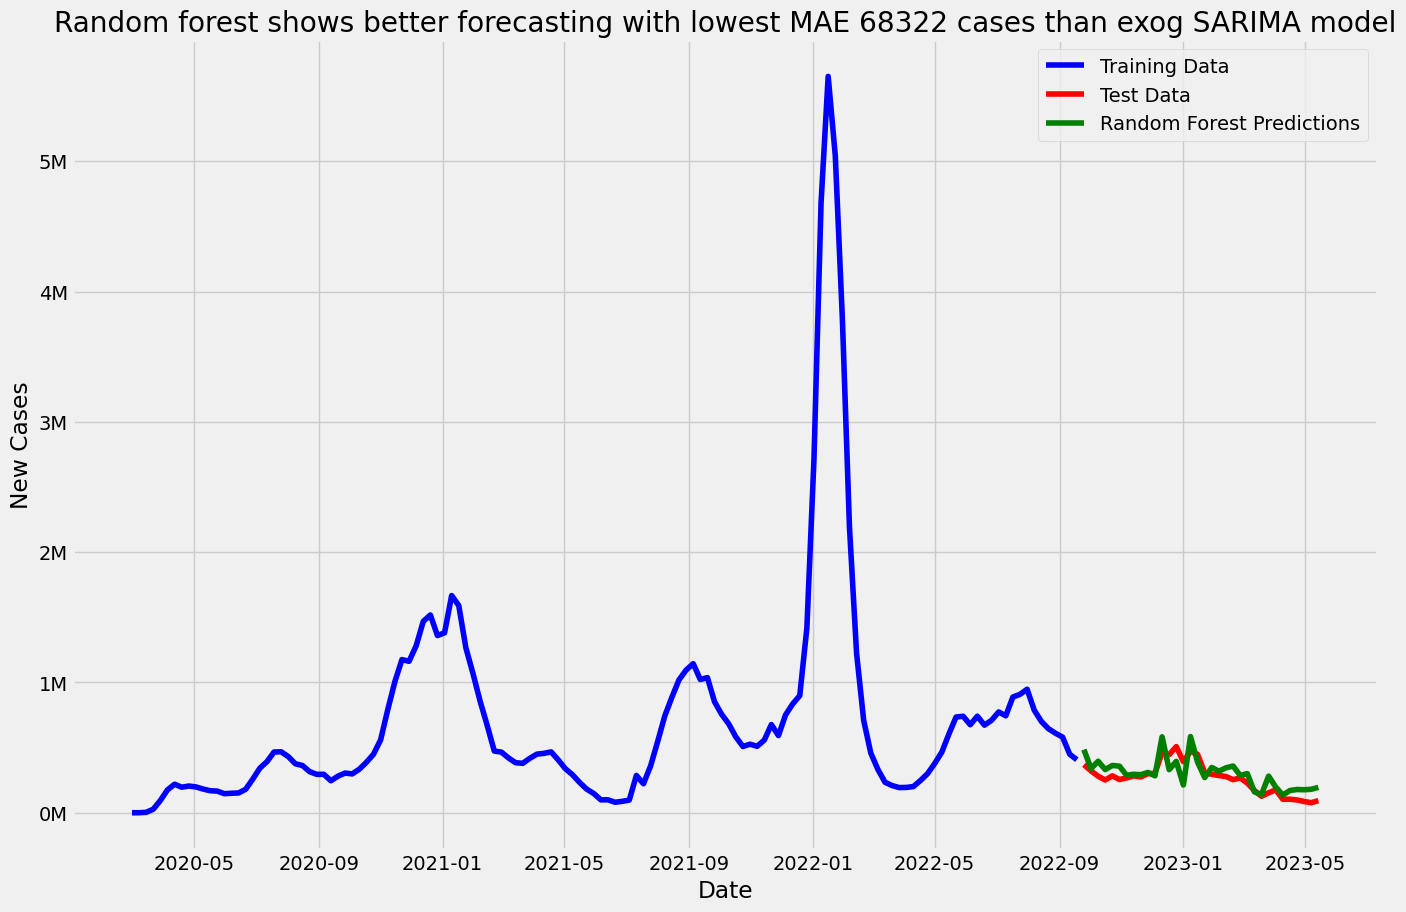

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define features and target
features = ['7_week_MA', 'weekly_growth_rate', 'R_t']
X = us_df[features]
y = us_df['new_cases']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# define the random forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.2f}")

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions)):.2f}")


#plot the train data, test data and predicted data
plt.figure(figsize=(15, 10))

#plt.plot(us_df.index, y, label="Actual Cases", color="green")
plt.plot(X_train.index, y_train, label="Training Data", color="blue")
plt.plot(X_test.index, y_test, label="Test Data", color="red")
plt.plot(X_test.index, rf_predictions, label="Random Forest Predictions", color="green")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.legend()
plt.title("Random forest shows better forecasting with lowest MAE 68322 cases than exog SARIMA model")
plt.xlabel("Date")
#plt.xticks(rotation=45)
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

# 9. XGBoost Model

XGBoost Performance:
MAE: 122012.04
RMSE: 181259.31


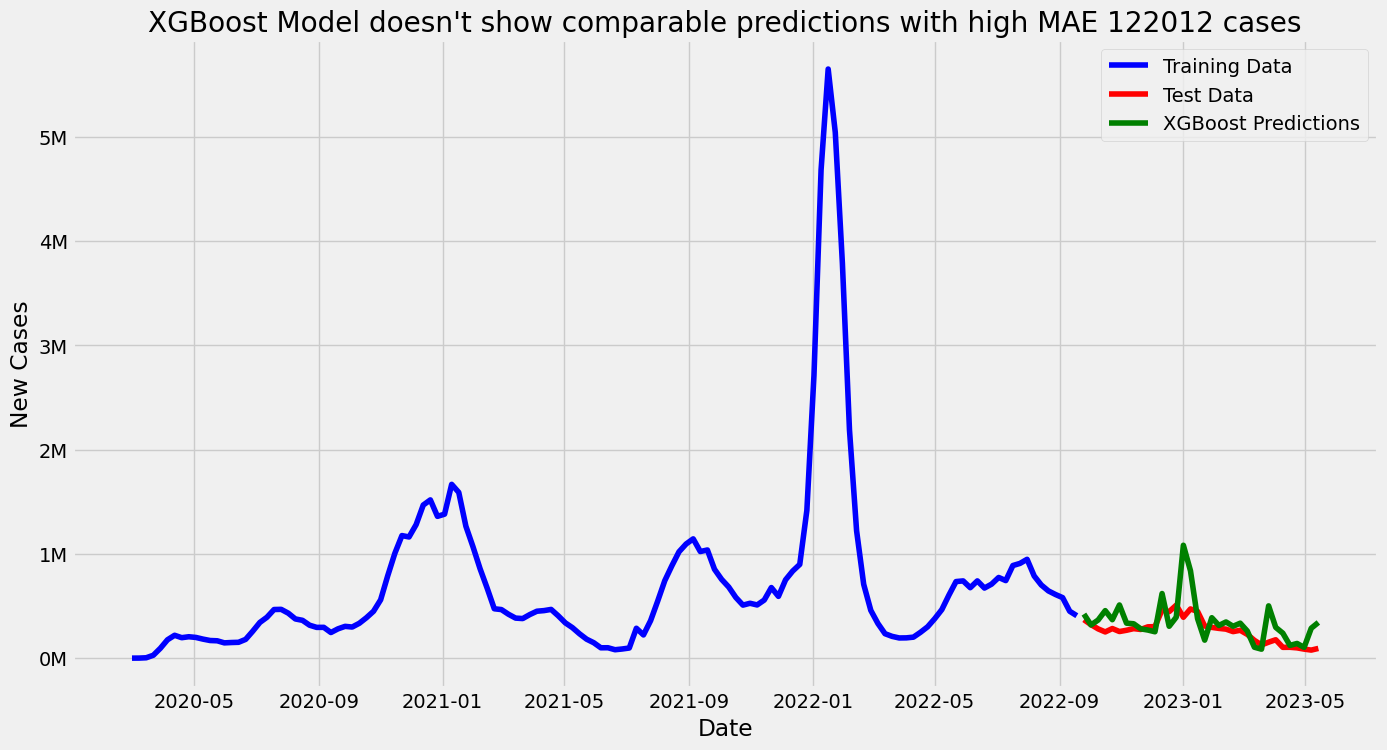

In [65]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Performance:")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions):.2f}")

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions)):.2f}")

#plot the train data, test data and predicted data
plt.figure(figsize=(15, 8))


plt.plot(X_train.index, y_train, label="Training Data", color="blue")
plt.plot(X_test.index, y_test, label="Test Data", color="red")
plt.plot(X_test.index, xgb_predictions, label="XGBoost Predictions", color="green")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.legend()
plt.title("XGBoost Model doesn't show comparable predictions with high MAE 122012 cases")
plt.xlabel("Date")
#plt.xticks(rotation=45)
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

# 10. Long Short-Term Memory (LSTM) Model
Here we will process the data for LSTM model fitting.

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Load and prepare data
data = pd.read_csv('cleaned_global_covid.csv')

# Filter US data and set date as index
data = data.set_index('date_reported')
data = data[data['country_code'] == 'US']
# 7-week moving average
data['7_week_MA'] = data['new_cases'].rolling(window=7).mean()

# Week-over-week growth rate
data['weekly_growth_rate'] = ((data['new_cases'] - data['new_cases'].shift(1)) / data['new_cases'].shift(1)) * 100

# Reproduction number (weekly R₀ approximation)
serial_interval_weeks = 1
data['R_t'] = data['new_cases'] / data['new_cases'].shift(serial_interval_weeks)

# Fill any NaNs from shifts
data.fillna(method='bfill', inplace=True)


# Select features: new_cases + exogenous variables
features_l = data[['new_cases', '7_week_MA', 'weekly_growth_rate', 'R_t']]

# Define sequence creation function for multiple features
def create_multifeature_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length][0])
    return np.array(xs), np.array(ys)

# Set sequence length
seq_length = 21
X, y = create_multifeature_sequences(features_l.values, seq_length)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Define LSTM model with multiple features
model = Sequential([
    LSTM(200, activation='relu', input_shape=(seq_length, X_train.shape[2])),
    Dense(1)
])
# Compile and train the model
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=5000, validation_split=0.2, verbose=0, callbacks=[early_stop])


# Print final training loss
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Training Loss: {final_loss:.2f}, Final Validation Loss: {final_val_loss:.2f}")

# Make predictions
test_predictions = model.predict(X_test).flatten()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error: {mae:.2f}")


Final Training Loss: 538300776448.00, Final Validation Loss: 370873958400.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Mean Absolute Error: 418431.85


Root Mean Square Error: 93155.53


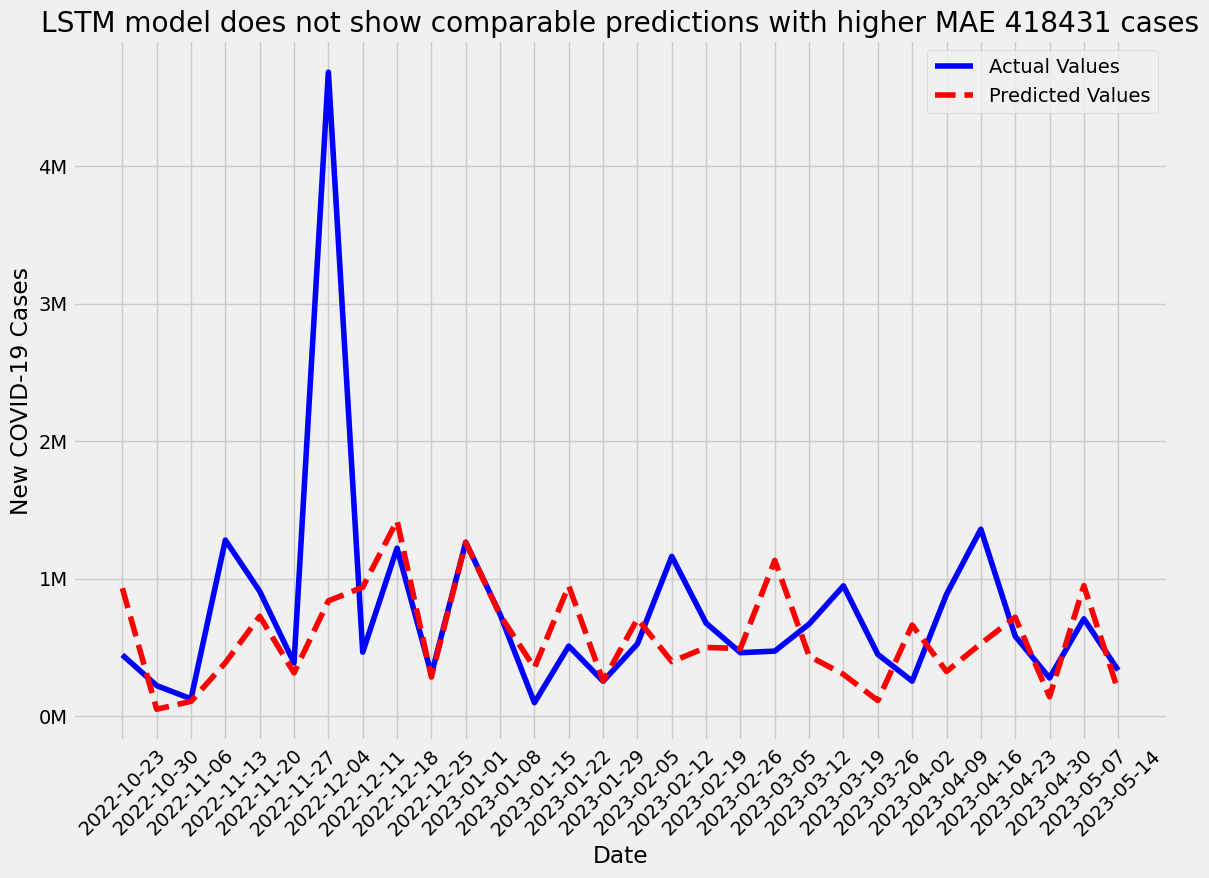

In [69]:
# Calculate Root Mean Square Error (RSME)
mae = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Root Mean Square Error: {rmse:.2f}")

# Plot actual vs predicted values with dates
test_dates = data.index[-len(y_test):]
plt.figure(figsize=(12, 9))
plt.plot(test_dates, y_test, label='Actual Values', color='blue')
plt.plot(test_dates, test_predictions, label='Predicted Values', color='red', linestyle='--')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.title('LSTM model does not show comparable predictions with higher MAE 418431 cases')
plt.xlabel('Date')
plt.ylabel('New COVID-19 Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **10. Model Performance Analysis**
Here I am providing the comparison chart of the models and their performances.


In [70]:

# Data for the comparison
data = {
    "Model": [
        "ARIMA", "SARIMA", "exogSARIMA", "Random Forest",
        "XGBoost",  "LSTM"
    ],
    "MAE": [
        134360.86, 97100.10, 79852.14, 68322.60,
        122012.04, 411905.47
    ],
    "RMSE": [
        157527.53, 128000.76, 93150.65, 81348.77,
        181259.31, 93155.53
    ]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

# Display the DataFrame
display(df_comparison)


,Model,MAE,RMSE
0,ARIMA,134360.86,157527.53
1,SARIMA,97100.10,128000.76
2,exogSARIMA,79852.14,93150.65
3,Random Forest,68322.60,81348.77
4,XGBoost,122012.04,181259.31
5,LSTM,411905.47,93155.53


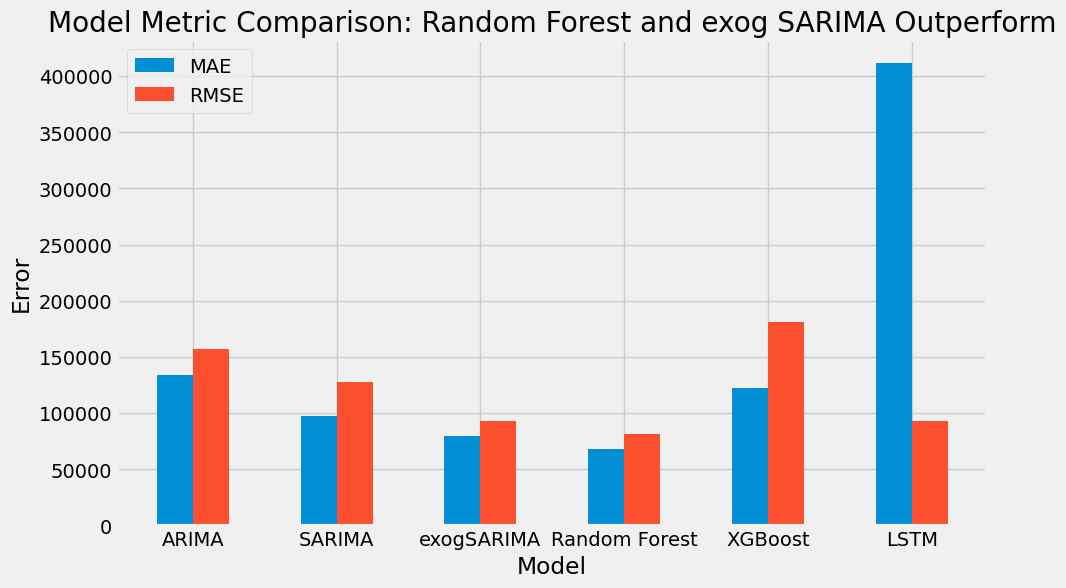

In [71]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of the bars
width = 0.25

# Create the x-axis positions for the bars
x = np.arange(len(df_comparison['Model']))

# Plot the MAE values
ax.bar(x - width/2, df_comparison['MAE'], width, label='MAE')

# Plot the RMSE values
ax.bar(x + width/2, df_comparison['RMSE'], width, label='RMSE')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df_comparison['Model'])

# Add a legend
ax.legend()

# Add labels to the axes
ax.set_ylabel('Error')
ax.set_xlabel('Model')

# Add a title
ax.set_title('Model Metric Comparison: Random Forest and exog SARIMA Outperform')

# Display the plot
plt.show()

# **11.Results**

### A. Deployment Environment
•	Cloud Platform: AWS EC2 (or alternatives like Azure/GCP)
•	API Framework: Flask/FastAPI for serving predictions
•	Containerization: Docker for reproducibility

### B. Model Pipeline
1.	Data Ingestion: Pulls the latest COVID-19 data daily
2.	Preprocessing: Data cleaning, scaling, feature engineering
3.	Prediction: Generates future forecasts
4.	Visualization: Displays predictions in a web app

### C. Endpoint Setup
•	Input: Date range, exogenous variables
•	Output: Predicted new COVID-19 cases
•	Endpoint Example: /predict?start=2025-03-18&days=60&reproduction number=0.89


# **Report of the Project**

### **1. Introduction**
The COVID-19 pandemic has profoundly impacted public health and the economy, necessitating forecasting and risk prediction models to help decision-making. Accurate forecasting of COVID-19 cases can assist policymakers, healthcare professionals, and researchers in optimizing resource allocation, implementing timely interventions, and mitigating the spread of the virus.
Goal: The primary goal of this project is to explore the COVID-19 trends around the globe and to develop a machine learning model to predict the daily new cases in the United States. This will involve:
•	Time Series Forecasting: predicting the daily number of new cases over the next few months.
### **2. Data Overview**
•	Dataset: WHO COVID-19 dataset

•	Time Period: Covers cases from early 2020 to 2023

•	Target Variable: New COVID-19 cases reported daily

•	Data Size: It consists of 57,840 entries and 8 columns.

•	Data Preprocessing: Handled missing values, ensured stationarity and applied log transformation for stabilization

### **3. Methodology**

**Exploratory Data Analysis (EDA)**
We used EDA to understand the distribution and trends of COVID-19 cases and deaths across different regions and countries.

**Forecasting Models**
We used 6 time series models to predict the future COVID-19 cases in the USA.

- ARIMA (AutoRegressive Integrated Moving Average): A widely used model for non-seasonal time series forecasting.
- SARIMA (Seasonal ARIMA): An extension of ARIMA that accounts for seasonality in the data.

- Exog SARIMA — extends SARIMA by adding external factors (e.g., growth rate, reproduction number).
- Random Forest Regressor — handles time-lagged features and complex relationships.
- XGBoost — gradient boosting approach.
- LSTM — neural networks designed for sequential data.


### **4. Model Evaluation**
Each model was evaluated using MAE, MSE, RMSE, AIC, and BIC metrics.

Model Evaluation Observations:
1.	ARIMA vs. SARIMA:
- SARIMA outperforms ARIMA with lower MAE and RMSE.

2.	EXOG SARIMA:
- Incorporating exogenous factors improved MAE, and RMSE compared to ARIMA/SARIMA.

3.	Random Forest:
- Achieved significantly lower MAE than ARIMA, SARIMA, and exog SARIMA indicating strong absolute error reduction.

4.	XGBoost:
- Higher MAE and RMSE suggest it struggles more with this dataset compared to Random Forest.

5.	LSTM:
- LSTM performs the worst, with an extremely high MAE value.

### **5. Results and Analysis**
**EDA provides the following insights:**

-	The EMRO and EURO regions show a higher frequency of case counts, whereas other regions exhibit a wider range of variation.
-	The distribution of new deaths across regions is right-skewed, indicating many days with low deaths but occasional extreme spikes, suggesting outbreaks.
-	The data reveals multiple peaks, likely corresponding to different COVID-19 waves, such as the Delta and Omicron variants.
-	The EURO region had the highest number of cases at the beginning of 2022, while WPRO saw the highest cases at the end of 2022.
-	The USA recorded the highest number of new cases at the start of 2022, and China had the highest cases by the end of the year.

- Analysis of death surges indicated about six major waves, with the highest peaks occurring in early 2021 and early 2022 due to insufficient intervention measures.
-	The highest death toll was observed in the US, particularly during early 2021 and early 2022, whereas India experienced a massive surge in mid-2021 due to the Delta variant.


 **Modeling provides the following insights:**
1. Random Forest and exogSARIMA outperform other models
- These models have the lowest MAE and RMSE, indicating higher accuracy in COVID-19 forecasting.

- exogSARIMA suggests that incorporating exogenous factors (e.g., vaccination rates, mobility data) improves time-series forecasting.

- Random Forest, a non-linear model, effectively captures complex patterns, making it a strong choice for pandemic forecasting.

2. LSTM performs poorly for COVID-19 predictions
- LSTM has an extremely high MAE, suggesting it struggles with capturing COVID-19 case fluctuations effectively.

- While deep learning models often excel with large datasets, traditional time-series or ensemble-based models seem to work better in this case.

3. ARIMA and SARIMA show moderate performance

- These models rely heavily on past data trends and are not well-suited for sudden shifts in COVID-19 cases due to policy changes, new variants, or external interventions.

- SARIMA performs slightly better than ARIMA, likely because it accounts for seasonality.

4. XGBoost is better than ARIMA and SARIMA but worse than Random Forest

- XGBoost, a gradient boosting model, captures non-linear trends better than traditional time-series models but does not outperform Random Forest.

### **6. Conclusion:**
Random Forest and exogSARIMA are the most effective models in this comparison, while LSTM shows poor performance.


### **7. Recommendations**
- Use Random Forest and exogSARIMA for short-term COVID-19 case prediction to inform healthcare resource planning and government interventions.
- Integrate these models with real-time dashboards to detect potential surges and mitigate outbreaks.

- Governments and healthcare institutions should consider exogenous factors like vaccination rates in their forecasting models for improved accuracy.

### **8. Next Steps**
- Improve exogSARIMA by incorporating additional external factors such as hospitalizations, variant-specific data, and real-time mobility patterns.

- Combine machine learning and statistical models (e.g., Hybrid SARIMA-RF) for improved performance.

-  Improve LSTM by adjusting hyperparameters, increasing training data size, and using attention mechanisms.
